<!-- <div>
    <img src="attachment:image.png" align="right" width="150">
</div> -->

# <font color='#5D6D7E '> <center >Forecasting - ETH</center>
    
### Master Degree Program in Data Science and Advanced Analytics    
    
### <font color='#5D6D7E '> Business Cases with Data Science Project: 
> #### Group AA

### <font color='#5D6D7E '> Done by:
> #### - Beatriz Martins Selidónio Gomes, m20210545
> #### - Catarina Inês Lopes Garcez, m20210547    
> #### - Diogo André Domingues Pires, m20201076  
> #### - Rodrigo Faísca Guedes, m20210587 

---

<div>
    
# Table of Content<a class="anchor"><a id='toc'></a>

### <font color='#5D6D7E '> Import and Data Integration  
- [<font color='#000000'>Import the needed Libraries</font>](#third-bullet)<br> 

### <font color='#5D6D7E '> Data Exploration and Understanding    
- [<font color='#000000'>Initial Analysis (EDA - Exploratory Data Analysis)</font>](#fifth-bullet)<br> 
- [<font color='#000000'>Variables Distribution</font>](#seventh-bullet)<br>    
    
### <font color='#5D6D7E '> Data Preparation      
- [<font color='#000000'>Data Transformation</font>](#eighth-bullet)<br>
    
### <font color='#5D6D7E '> Modelling    
- [<font color='#000000'>Building LSTM Model</font>](#twentysecond-bullet)<br>   
- [<font color='#000000'>Get Best Parameters for LSTM</font>](#twentythird-bullet)<br> 
- [<font color='#000000'>Run the LSTM Model and Get Predictions</font>](#twentyfourth-bullet)<br>   
- [<font color='#000000'>Recursive Predictions</font>](#twentysixth-bullet)<br>   
  

</div>

---

# Import and Data Integration


## <font color='#5D6D7E '>Import the needed Libraries</font> <a class="anchor" id="third-bullet"></a>
  [Back to TOC](#toc)

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Exploration and Understanding

## <font color='#5D6D7E'>Initial Analysis (EDA - Exploratory Data Analysis) </font> <a class="anchor" id="fifth-bullet"></a>
  [Back to TOC](#toc)


In [2]:
df = pd.read_csv('../data/data_aux/df_ETH.csv')
df

,Date,ETH-USD_ADJCLOSE,ETH-USD_CLOSE,ETH-USD_HIGH,ETH-USD_LOW,ETH-USD_OPEN,ETH-USD_VOLUME
0,2017-04-26,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-04-27,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-04-28,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-04-29,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-04-30,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1821,2022-04-21,2987.480713,2987.480713,3173.451416,2962.410400,3077.829346,2.078359e+10
1822,2022-04-22,2964.835693,2964.835693,3024.854492,2942.358643,2986.938721,1.678280e+10
1823,2022-04-23,2938.114014,2938.114014,2975.322754,2926.740234,2964.802246,9.116956e+09
1824,2022-04-24,2922.732666,2922.732666,2961.882080,2922.128662,2937.347168,9.696830e+09


### Data Types

In [3]:
# Get to know the number of instances and Features, the DataTypes and if there are missing values in each Feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              1826 non-null   object 
 1   ETH-USD_ADJCLOSE  1629 non-null   float64
 2   ETH-USD_CLOSE     1629 non-null   float64
 3   ETH-USD_HIGH      1629 non-null   float64
 4   ETH-USD_LOW       1629 non-null   float64
 5   ETH-USD_OPEN      1629 non-null   float64
 6   ETH-USD_VOLUME    1629 non-null   float64
dtypes: float64(6), object(1)
memory usage: 100.0+ KB


### Missing Values

In [4]:
# Count the number of missing values for each Feature
df.isna().sum().to_frame().rename(columns={0: 'Count Missing Values'})

,Count Missing Values
Date,0
ETH-USD_ADJCLOSE,197
ETH-USD_CLOSE,197
ETH-USD_HIGH,197
ETH-USD_LOW,197
ETH-USD_OPEN,197
ETH-USD_VOLUME,197


### Descriptive Statistics

In [5]:
# Descriptive Statistics Table
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ETH-USD_ADJCLOSE,1629.0,1.068500e+03,1.254817e+03,8.430830e+01,1.973175e+02,3.938883e+02,1.806972e+03,4.812087e+03
ETH-USD_CLOSE,1629.0,1.068500e+03,1.254817e+03,8.430830e+01,1.973175e+02,3.938883e+02,1.806972e+03,4.812087e+03
ETH-USD_HIGH,1629.0,1.102866e+03,1.293636e+03,8.534274e+01,2.035005e+02,4.063040e+02,1.843819e+03,4.891705e+03
ETH-USD_LOW,1629.0,1.027068e+03,1.209969e+03,8.282989e+01,1.932590e+02,3.812953e+02,1.729642e+03,4.718039e+03
ETH-USD_OPEN,1629.0,1.067100e+03,1.254566e+03,8.427969e+01,1.975370e+02,3.916790e+02,1.804677e+03,4.810071e+03
ETH-USD_VOLUME,1629.0,1.252477e+10,1.114217e+10,6.217330e+08,3.298281e+09,9.766632e+09,1.776813e+10,8.448291e+10


In [6]:
# settings to display all columns
pd.set_option("display.max_columns", None)

# display the dataframe head
df.sample(n=10)

,Date,ETH-USD_ADJCLOSE,ETH-USD_CLOSE,ETH-USD_HIGH,ETH-USD_LOW,ETH-USD_OPEN,ETH-USD_VOLUME
222,2017-12-04,470.204010,470.204010,474.777008,453.312012,466.053986,1.005550e+09
675,2019-03-02,134.206955,134.206955,137.184799,132.436386,136.350082,3.747176e+09
1402,2021-02-26,1446.033691,1446.033691,1559.028931,1407.979248,1478.653320,3.143600e+10
1201,2020-08-09,391.120453,391.120453,399.737091,385.830719,395.305237,9.451066e+09
1182,2020-07-21,245.016724,245.016724,246.186264,235.680969,236.302505,6.806696e+09
1200,2020-08-08,393.987366,393.987366,393.987366,377.349731,379.551575,9.342061e+09
299,2018-02-19,943.864990,943.864990,957.776978,921.554016,921.668030,2.169020e+09
844,2019-08-18,194.493530,194.493530,197.522491,183.692245,185.841095,5.969012e+09
577,2018-11-24,113.494003,113.494003,126.788002,110.824997,123.304001,1.800960e+09
943,2019-11-25,146.476532,146.476532,150.207962,133.802338,142.697006,1.096275e+10


In [7]:
#CHECK ROWS THAT HAVE ANY MISSING VALUE IN ONE OF THE COLUMNS
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
rows_with_NaN

,Date,ETH-USD_ADJCLOSE,ETH-USD_CLOSE,ETH-USD_HIGH,ETH-USD_LOW,ETH-USD_OPEN,ETH-USD_VOLUME
0,2017-04-26,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-04-27,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-04-28,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-04-29,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-04-30,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
192,2017-11-04,NaN,NaN,NaN,NaN,NaN,NaN
193,2017-11-05,NaN,NaN,NaN,NaN,NaN,NaN
194,2017-11-06,NaN,NaN,NaN,NaN,NaN,NaN
195,2017-11-07,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#FILTER OUT ROWS THAT ARE MISSING INFORMATION
df = df[~row_has_NaN]
df.reset_index(inplace=True, drop=True)
df

,Date,ETH-USD_ADJCLOSE,ETH-USD_CLOSE,ETH-USD_HIGH,ETH-USD_LOW,ETH-USD_OPEN,ETH-USD_VOLUME
0,2017-11-09,320.884003,320.884003,329.451996,307.056000,308.644989,8.932500e+08
1,2017-11-10,299.252991,299.252991,324.717987,294.541992,320.670990,8.859860e+08
2,2017-11-11,314.681000,314.681000,319.453003,298.191986,298.585999,8.423010e+08
3,2017-11-12,307.907990,307.907990,319.153015,298.513000,314.690002,1.613480e+09
4,2017-11-13,316.716003,316.716003,328.415009,307.024994,307.024994,1.041890e+09
...,...,...,...,...,...,...,...
1624,2022-04-21,2987.480713,2987.480713,3173.451416,2962.410400,3077.829346,2.078359e+10
1625,2022-04-22,2964.835693,2964.835693,3024.854492,2942.358643,2986.938721,1.678280e+10
1626,2022-04-23,2938.114014,2938.114014,2975.322754,2926.740234,2964.802246,9.116956e+09
1627,2022-04-24,2922.732666,2922.732666,2961.882080,2922.128662,2937.347168,9.696830e+09


# Data Preparation


## <font color='#5D6D7E'>Data Transformation</font> <a class="anchor" id="eighth-bullet"></a>
  [Back to TOC](#toc)

 __`Duplicates`__

In [9]:
# Checking if exist duplicated observations
print(f'\033[1m' + "Number of duplicates: " + '\033[0m', df.duplicated().sum())  

Number of duplicates:  0


 __`Convert Date to correct format`__

In [10]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df

,Date,ETH-USD_ADJCLOSE,ETH-USD_CLOSE,ETH-USD_HIGH,ETH-USD_LOW,ETH-USD_OPEN,ETH-USD_VOLUME
0,2017-11-09,320.884003,320.884003,329.451996,307.056000,308.644989,8.932500e+08
1,2017-11-10,299.252991,299.252991,324.717987,294.541992,320.670990,8.859860e+08
2,2017-11-11,314.681000,314.681000,319.453003,298.191986,298.585999,8.423010e+08
3,2017-11-12,307.907990,307.907990,319.153015,298.513000,314.690002,1.613480e+09
4,2017-11-13,316.716003,316.716003,328.415009,307.024994,307.024994,1.041890e+09
...,...,...,...,...,...,...,...
1624,2022-04-21,2987.480713,2987.480713,3173.451416,2962.410400,3077.829346,2.078359e+10
1625,2022-04-22,2964.835693,2964.835693,3024.854492,2942.358643,2986.938721,1.678280e+10
1626,2022-04-23,2938.114014,2938.114014,2975.322754,2926.740234,2964.802246,9.116956e+09
1627,2022-04-24,2922.732666,2922.732666,2961.882080,2922.128662,2937.347168,9.696830e+09


 __`Get percentual difference between open and close values and low and high values`__

In [11]:
df['pctDiff_CloseOpen'] = abs((df[df.columns[2]]-df[df.columns[5]])/df[df.columns[2]])*100
df['pctDiff_HighLow'] = abs((df[df.columns[3]]-df[df.columns[4]])/df[df.columns[4]])*100
df.head()

,Date,ETH-USD_ADJCLOSE,ETH-USD_CLOSE,ETH-USD_HIGH,ETH-USD_LOW,ETH-USD_OPEN,ETH-USD_VOLUME,pctDiff_CloseOpen,pctDiff_HighLow
0,2017-11-09,320.884003,320.884003,329.451996,307.056000,308.644989,8.932500e+08,3.814155,7.293782
1,2017-11-10,299.252991,299.252991,324.717987,294.541992,320.670990,8.859860e+08,7.157155,10.245057
2,2017-11-11,314.681000,314.681000,319.453003,298.191986,298.585999,8.423010e+08,5.114704,7.129976
3,2017-11-12,307.907990,307.907990,319.153015,298.513000,314.690002,1.613480e+09,2.202610,6.914277
4,2017-11-13,316.716003,316.716003,328.415009,307.024994,307.024994,1.041890e+09,3.059842,6.966864


In [12]:
def plot_coinValue(df):
    
    #Get coin name
    coin_name = df.columns[2].split('-')[0]
    
    #Get date and coin value
    x = df['Date']
    y = df[df.columns[2]] # ADA-USD_CLOSE
    
    #Get the volume of trades
    v = df[df.columns[-3]]/1e9
    
    #Get percentual diferences
    y2 = df[df.columns[-1]] # pctDiff_HighLow
    y1= df[df.columns[-2]]  # pctDiff_CloseOpen
    
    fig, axs = plt.subplots(3, 1, figsize=(12,14))
    
    axs[0].plot(x, y)
    axs[2].plot(x, v)
    
    # plotting the line 1 points 
    axs[1].plot(x, y1, label = "Close/Open")

    # plotting the line 2 points 
    axs[1].plot(x, y2, label = "High/Low")
    axs[1].legend()
    
    axs[0].title.set_text('Time Evolution of '+ coin_name)
    axs[0].set(xlabel="", ylabel="Close Value in USD$")
    
    axs[2].title.set_text('Volume of trades of '+ coin_name)
    axs[2].set(xlabel="", ylabel="Total number of trades in billions")
    
    
    axs[1].title.set_text('Daily Market percentual differences of '+ coin_name)
    axs[1].set(xlabel="", ylabel="Percentage (%)")
    
    plt.savefig('../analysis/'+coin_name +'_stats'+'.png')
    
    return coin_name

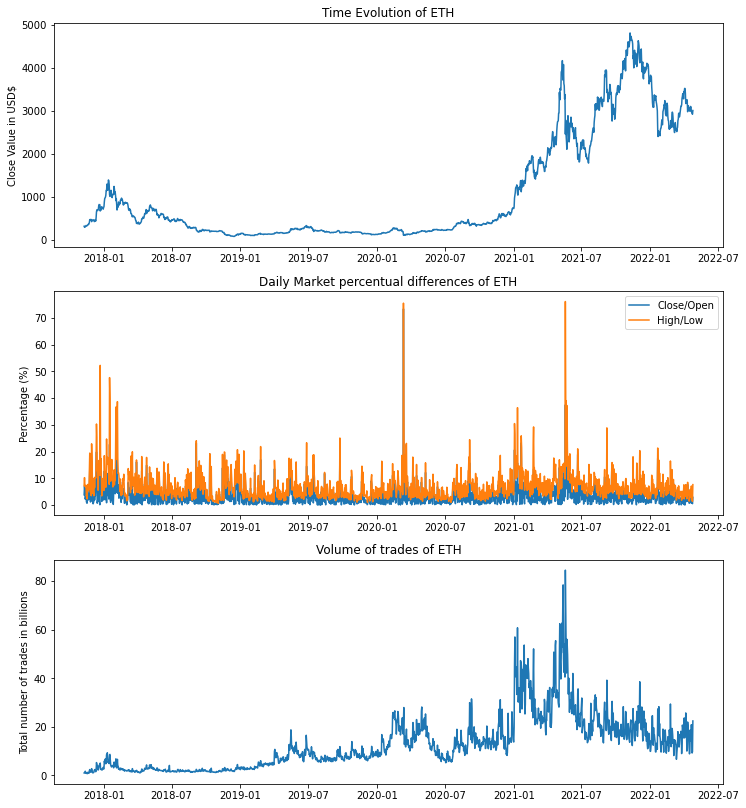

In [13]:
coin_name = plot_coinValue(df)

In [14]:
#FILTER DATASET
df = df.loc[df['Date']>= '2021-01-01']
df

,Date,ETH-USD_ADJCLOSE,ETH-USD_CLOSE,ETH-USD_HIGH,ETH-USD_LOW,ETH-USD_OPEN,ETH-USD_VOLUME,pctDiff_CloseOpen,pctDiff_HighLow
1149,2021-01-01,730.367554,730.367554,749.201843,719.792236,737.708374,1.365200e+10,1.005086,4.085847
1150,2021-01-02,774.534973,774.534973,786.798462,718.109497,730.402649,1.974077e+10,5.697912,9.565249
1151,2021-01-03,975.507690,975.507690,1006.565002,771.561646,774.511841,4.520046e+10,20.604230,30.458144
1152,2021-01-04,1040.233032,1040.233032,1153.189209,912.305359,977.058838,5.694599e+10,6.073081,26.403862
1153,2021-01-05,1100.006104,1100.006104,1129.371460,986.811279,1041.498779,4.153593e+10,5.318818,14.446550
...,...,...,...,...,...,...,...,...,...
1624,2022-04-21,2987.480713,2987.480713,3173.451416,2962.410400,3077.829346,2.078359e+10,3.024242,7.123963
1625,2022-04-22,2964.835693,2964.835693,3024.854492,2942.358643,2986.938721,1.678280e+10,0.745506,2.803732
1626,2022-04-23,2938.114014,2938.114014,2975.322754,2926.740234,2964.802246,9.116956e+09,0.908346,1.659953
1627,2022-04-24,2922.732666,2922.732666,2961.882080,2922.128662,2937.347168,9.696830e+09,0.500029,1.360427


# Modelling


## <font color='#5D6D7E'>Building LSTM Model</font> <a class="anchor" id="twentysecond-bullet"></a>
  [Back to TOC](#toc)

## Strategy

Create a DF (windowed_df) where the middle columns will correspond to the close values of X days before the target date and the final column will correspond to the close value of the target date. Use these values for prediction and play with the value of X

In [15]:
def get_windowed_df(X, df):
    start_Date = df['Date'] + pd.Timedelta(days=X)
    
    perm = np.zeros((1,X+1))
    
    #Get labels for DataFrame
    j=1
    labels=[]
    
    while j <= X:
        label = 'closeValue_' + str(j) + 'daysBefore'
        labels.append(label)
        
        j+=1
 
    labels.append('closeValue')
    
    for i in range(X,df.shape[0]):
        temp = np.zeros((1,X+1))
        
        #Date for i-th day
        #temp[0,0] = df.iloc[i]['Date']
        
        #Close values for k days before
        for k in range(X):           
            temp[0,k] = df.iloc[i-k-1,2]
            
        #Close value for i-th date
        temp[0,-1] = df.iloc[i,2]
        

        #Add values to the permanent frame
        perm = np.vstack((perm,temp))
        
        #Get the array in dataframe form
        windowed_df = pd.DataFrame(perm[1:,:], columns = labels)
        
    return windowed_df

In [16]:
#Get the dataframe and append the dates
windowed_df = get_windowed_df(3, df)
windowed_df['Date'] = df.iloc[3:]['Date'].reset_index(drop=True)
windowed_df

,closeValue_1daysBefore,closeValue_2daysBefore,closeValue_3daysBefore,closeValue,Date
0,975.507690,774.534973,730.367554,1040.233032,2021-01-04
1,1040.233032,975.507690,774.534973,1100.006104,2021-01-05
2,1100.006104,1040.233032,975.507690,1207.112183,2021-01-06
3,1207.112183,1100.006104,1040.233032,1225.678101,2021-01-07
4,1225.678101,1207.112183,1100.006104,1224.197144,2021-01-08
...,...,...,...,...,...
472,3077.745850,3104.106445,3057.606689,2987.480713,2022-04-21
473,2987.480713,3077.745850,3104.106445,2964.835693,2022-04-22
474,2964.835693,2987.480713,3077.745850,2938.114014,2022-04-23
475,2938.114014,2964.835693,2987.480713,2922.732666,2022-04-24


In [17]:
#Get the X,y and dates into a numpy array to apply on a model

def windowed_df_to_date_X_y(windowed_dataframe):
    df_as_np = windowed_dataframe.to_numpy()

    dates = df_as_np[:, -1]

    middle_matrix = df_as_np[:, 0:-2]
    X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

    Y = df_as_np[:, -2]

    return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((477,), (477, 3, 1), (477,))

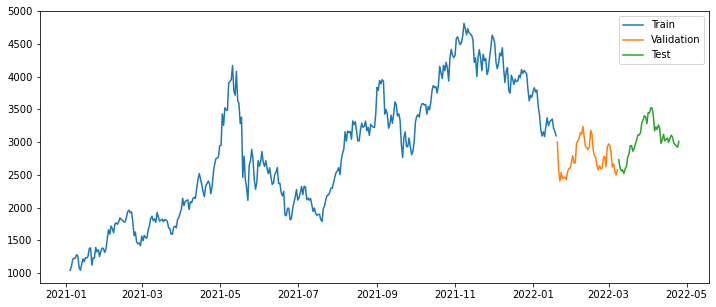

In [18]:
#Partition for train, validation and test

q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

fig,axs = plt.subplots(1, 1, figsize=(12,5))

#Plot the partitions
axs.plot(dates_train, y_train)
axs.plot(dates_val, y_val)
axs.plot(dates_test, y_test)

axs.legend(['Train', 'Validation', 'Test'])

fig.savefig('../analysis/'+coin_name +'_partition'+'.png')

## <font color='#5D6D7E'>Get Best Parameters for LSTM</font> <a class="anchor" id="twentythird-bullet"></a>
  [Back to TOC](#toc)

In [19]:
#!pip install tensorflow

In [20]:
#import os
#os.environ['PYTHONHASHSEED']= '0'
#import numpy as np
#np.random.seed(1)
#import random as rn
#rn.seed(1)
#import tensorflow as tf
#tf.random.set_seed(1)
#
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.optimizers import Adam
#from tensorflow.keras import layers
#from sklearn.metrics import mean_squared_error
#
## Function to create LSTM model and compute the MSE value for the given parameters
#def check_model(X_train, y_train, X_val, y_val, X_test, y_test, learning_rate,epoch,batch):
#    
#    # create model
#    model = Sequential([layers.Input((3, 1)),
#                        layers.LSTM(64),
#                        layers.Dense(32, activation='relu'),
#                        layers.Dense(32, activation='relu'),
#                        layers.Dense(1)])
#    # Compile model
#    model.compile(loss='mse', optimizer=Adam(learning_rate=learning_rate), metrics=['mean_absolute_error'])
#    
#    model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epoch, shuffle=False, batch_size=batch, verbose=2)
#    
#    test_predictions = model.predict(X_test).flatten()
#    
#    LSTM_mse = mean_squared_error(y_test, test_predictions)
#    
#    return LSTM_mse
#
##Function that iterates the different parameters and gets the ones corresponding to the lowest MSE score.
#def search_parameters(batch_size, epochs, learn_rate, X_train, y_train, X_val, y_val, X_test, y_test):
#    
#    best_score = float('inf')
#    
#    for b in batch_size:
#        for e in epochs:
#            for l in learn_rate:
#                print('Batch Size: ' + str(b))
#                print('Number of Epochs: ' + str(e))
#                print('Value of Learning Rate: ' + str(l))
#                try:
#                    mse = check_model(X_train, y_train, X_val, y_val, X_test, y_test,l,e,b)
#                    print('MSE=%.3f' % (mse))
#                    if mse < best_score:
#                        best_score = mse
#                        top_params = [b, e, l]
#                except:
#                    continue
#                    
#    print('Best MSE=%.3f' % (best_score))
#    print('Optimal Batch Size: ' + str(top_params[0]))
#    print('Optimal Number of Epochs: ' + str(top_params[1]))
#    print('Optimal Value of Learning Rate: ' + str(top_params[2]))
#                        
#
## define parameters
#batch_size = [10, 100, 1000]
#epochs = [50, 100]
#learn_rate = np.linspace(0.001,0.1, num=10)
#
#warnings.filterwarnings("ignore")
#search_parameters(batch_size, epochs, learn_rate, X_train, y_train, X_val, y_val, X_test, y_test)

Batch Size: 10
Number of Epochs: 50
Value of Learning Rate: 0.001
Epoch 1/50
39/39 - 2s - loss: 8952637.0000 - mean_absolute_error: 2822.1709 - val_loss: 7681097.5000 - val_mean_absolute_error: 2762.2668 - 2s/epoch - 41ms/step
Epoch 2/50
39/39 - 0s - loss: 8930309.0000 - mean_absolute_error: 2818.4934 - val_loss: 7646270.0000 - val_mean_absolute_error: 2755.9561 - 81ms/epoch - 2ms/step
Epoch 3/50
39/39 - 0s - loss: 8869422.0000 - mean_absolute_error: 2808.4197 - val_loss: 7559246.0000 - val_mean_absolute_error: 2740.1218 - 89ms/epoch - 2ms/step
Epoch 4/50
39/39 - 0s - loss: 8734875.0000 - mean_absolute_error: 2785.7195 - val_loss: 7379877.5000 - val_mean_absolute_error: 2707.1941 - 88ms/epoch - 2ms/step
Epoch 5/50
39/39 - 0s - loss: 8478316.0000 - mean_absolute_error: 2741.4297 - val_loss: 7062556.0000 - val_mean_absolute_error: 2647.9385 - 83ms/epoch - 2ms/step
Epoch 6/50
39/39 - 0s - loss: 8076081.0000 - mean_absolute_error: 2669.4709 - val_loss: 6597560.5000 - val_mean_absolute_erro

Epoch 2/50
39/39 - 0s - loss: 3530634.0000 - mean_absolute_error: 1776.1121 - val_loss: 64113.2852 - val_mean_absolute_error: 200.7647 - 85ms/epoch - 2ms/step
Epoch 3/50
39/39 - 0s - loss: 1041514.1875 - mean_absolute_error: 889.4091 - val_loss: 340441.8438 - val_mean_absolute_error: 538.0190 - 79ms/epoch - 2ms/step
Epoch 4/50
39/39 - 0s - loss: 1491929.2500 - mean_absolute_error: 1051.1072 - val_loss: 170639.8594 - val_mean_absolute_error: 356.7434 - 74ms/epoch - 2ms/step
Epoch 5/50
39/39 - 0s - loss: 1331025.7500 - mean_absolute_error: 995.5134 - val_loss: 199940.0625 - val_mean_absolute_error: 390.8838 - 84ms/epoch - 2ms/step
Epoch 6/50
39/39 - 0s - loss: 1364494.1250 - mean_absolute_error: 1010.5344 - val_loss: 177444.6719 - val_mean_absolute_error: 364.4223 - 83ms/epoch - 2ms/step
Epoch 7/50
39/39 - 0s - loss: 1336874.3750 - mean_absolute_error: 1001.0948 - val_loss: 174146.2031 - val_mean_absolute_error: 360.7267 - 79ms/epoch - 2ms/step
Epoch 8/50
39/39 - 0s - loss: 1331086.0000 

Epoch 3/50
39/39 - 0s - loss: 2030549.1250 - mean_absolute_error: 1192.8684 - val_loss: 711949.5000 - val_mean_absolute_error: 813.0019 - 76ms/epoch - 2ms/step
Epoch 4/50
39/39 - 0s - loss: 1794519.5000 - mean_absolute_error: 1124.0770 - val_loss: 719198.5625 - val_mean_absolute_error: 817.4479 - 75ms/epoch - 2ms/step
Epoch 5/50
39/39 - 0s - loss: 1790390.6250 - mean_absolute_error: 1122.8126 - val_loss: 687189.6875 - val_mean_absolute_error: 797.6291 - 74ms/epoch - 2ms/step
Epoch 6/50
39/39 - 0s - loss: 1773276.8750 - mean_absolute_error: 1117.9681 - val_loss: 673266.0625 - val_mean_absolute_error: 788.8527 - 75ms/epoch - 2ms/step
Epoch 7/50
39/39 - 0s - loss: 1765170.7500 - mean_absolute_error: 1115.6768 - val_loss: 663220.1875 - val_mean_absolute_error: 782.4595 - 73ms/epoch - 2ms/step
Epoch 8/50
39/39 - 0s - loss: 1731596.6250 - mean_absolute_error: 1106.0984 - val_loss: 851822.7500 - val_mean_absolute_error: 894.8996 - 77ms/epoch - 2ms/step
Epoch 9/50
39/39 - 0s - loss: 1863349.62

Epoch 4/50
39/39 - 0s - loss: 1844628.3750 - mean_absolute_error: 1138.8737 - val_loss: 795164.9375 - val_mean_absolute_error: 862.6630 - 80ms/epoch - 2ms/step
Epoch 5/50
39/39 - 0s - loss: 1832547.2500 - mean_absolute_error: 1135.3176 - val_loss: 766845.0000 - val_mean_absolute_error: 846.0895 - 80ms/epoch - 2ms/step
Epoch 6/50
39/39 - 0s - loss: 1736634.0000 - mean_absolute_error: 1109.3433 - val_loss: 1052457.3750 - val_mean_absolute_error: 1000.7397 - 82ms/epoch - 2ms/step
Epoch 7/50
39/39 - 0s - loss: 1957123.3750 - mean_absolute_error: 1172.0076 - val_loss: 746036.5625 - val_mean_absolute_error: 833.7021 - 91ms/epoch - 2ms/step
Epoch 8/50
39/39 - 0s - loss: 1811774.6250 - mean_absolute_error: 1129.4183 - val_loss: 773553.3125 - val_mean_absolute_error: 850.0446 - 88ms/epoch - 2ms/step
Epoch 9/50
39/39 - 0s - loss: 1821949.0000 - mean_absolute_error: 1132.3998 - val_loss: 755795.0000 - val_mean_absolute_error: 839.5341 - 79ms/epoch - 2ms/step
Epoch 10/50
39/39 - 0s - loss: 1802170

Epoch 5/50
39/39 - 0s - loss: 2850734.0000 - mean_absolute_error: 1470.9314 - val_loss: 3054042.0000 - val_mean_absolute_error: 1732.9352 - 77ms/epoch - 2ms/step
Epoch 6/50
39/39 - 0s - loss: 2683324.0000 - mean_absolute_error: 1422.9441 - val_loss: 2801223.0000 - val_mean_absolute_error: 1658.3862 - 74ms/epoch - 2ms/step
Epoch 7/50
39/39 - 0s - loss: 2600763.2500 - mean_absolute_error: 1397.9141 - val_loss: 2621141.2500 - val_mean_absolute_error: 1603.1730 - 78ms/epoch - 2ms/step
Epoch 8/50
39/39 - 0s - loss: 2542488.2500 - mean_absolute_error: 1379.6594 - val_loss: 2486150.5000 - val_mean_absolute_error: 1560.5040 - 78ms/epoch - 2ms/step
Epoch 9/50
39/39 - 0s - loss: 2498508.0000 - mean_absolute_error: 1365.5956 - val_loss: 2375559.0000 - val_mean_absolute_error: 1524.6578 - 74ms/epoch - 2ms/step
Epoch 10/50
39/39 - 0s - loss: 2462305.5000 - mean_absolute_error: 1353.7837 - val_loss: 2279375.2500 - val_mean_absolute_error: 1492.7819 - 76ms/epoch - 2ms/step
Epoch 11/50
39/39 - 0s - lo

MSE=347637.875
Batch Size: 10
Number of Epochs: 50
Value of Learning Rate: 0.05600000000000001
Epoch 1/50
39/39 - 1s - loss: 3156435.0000 - mean_absolute_error: 1646.6226 - val_loss: 4863834.5000 - val_mean_absolute_error: 2193.8225 - 1s/epoch - 37ms/step
Epoch 2/50
39/39 - 0s - loss: 3050910.0000 - mean_absolute_error: 1514.3535 - val_loss: 1058330.1250 - val_mean_absolute_error: 1003.6696 - 76ms/epoch - 2ms/step
Epoch 3/50
39/39 - 0s - loss: 1895224.6250 - mean_absolute_error: 1164.6566 - val_loss: 2061868.0000 - val_mean_absolute_error: 1418.0587 - 78ms/epoch - 2ms/step
Epoch 4/50
39/39 - 0s - loss: 2331716.0000 - mean_absolute_error: 1301.0857 - val_loss: 1547785.6250 - val_mean_absolute_error: 1223.4410 - 76ms/epoch - 2ms/step
Epoch 5/50
39/39 - 0s - loss: 2169151.2500 - mean_absolute_error: 1248.4431 - val_loss: 1551553.1250 - val_mean_absolute_error: 1224.9800 - 77ms/epoch - 2ms/step
Epoch 6/50
39/39 - 0s - loss: 2164154.5000 - mean_absolute_error: 1247.5050 - val_loss: 1523999.

MSE=420577.156
Batch Size: 10
Number of Epochs: 50
Value of Learning Rate: 0.067
Epoch 1/50
39/39 - 1s - loss: 1508723.7500 - mean_absolute_error: 992.8577 - val_loss: 1195610.8750 - val_mean_absolute_error: 1069.8755 - 1s/epoch - 36ms/step
Epoch 2/50
39/39 - 0s - loss: 2189384.0000 - mean_absolute_error: 1306.6592 - val_loss: 2466675.7500 - val_mean_absolute_error: 1554.2516 - 76ms/epoch - 2ms/step
Epoch 3/50
39/39 - 0s - loss: 3253325.5000 - mean_absolute_error: 1618.1871 - val_loss: 6090836.5000 - val_mean_absolute_error: 2457.6125 - 76ms/epoch - 2ms/step
Epoch 4/50
39/39 - 0s - loss: 3771490.5000 - mean_absolute_error: 1718.9159 - val_loss: 3856285.2500 - val_mean_absolute_error: 1950.7198 - 76ms/epoch - 2ms/step
Epoch 5/50
39/39 - 0s - loss: 2944882.2500 - mean_absolute_error: 1505.6284 - val_loss: 4459934.5000 - val_mean_absolute_error: 2099.7517 - 78ms/epoch - 2ms/step
Epoch 6/50
39/39 - 0s - loss: 3140693.7500 - mean_absolute_error: 1559.1569 - val_loss: 3496393.7500 - val_mean

Epoch 47/50
39/39 - 0s - loss: 1777696.7500 - mean_absolute_error: 1119.5636 - val_loss: 669168.7500 - val_mean_absolute_error: 786.2515 - 75ms/epoch - 2ms/step
Epoch 48/50
39/39 - 0s - loss: 1768341.1250 - mean_absolute_error: 1116.8131 - val_loss: 654092.3125 - val_mean_absolute_error: 776.6047 - 74ms/epoch - 2ms/step
Epoch 49/50
39/39 - 0s - loss: 1759259.7500 - mean_absolute_error: 1114.1984 - val_loss: 639641.6875 - val_mean_absolute_error: 767.2446 - 74ms/epoch - 2ms/step
Epoch 50/50
39/39 - 0s - loss: 1750453.2500 - mean_absolute_error: 1111.6993 - val_loss: 625789.3125 - val_mean_absolute_error: 758.1635 - 79ms/epoch - 2ms/step
MSE=293525.125
Batch Size: 10
Number of Epochs: 50
Value of Learning Rate: 0.07800000000000001
Epoch 1/50
39/39 - 1s - loss: 1882495.3750 - mean_absolute_error: 1286.6311 - val_loss: 3620769.2500 - val_mean_absolute_error: 1889.3893 - 1s/epoch - 36ms/step
Epoch 2/50
39/39 - 0s - loss: 3640622.7500 - mean_absolute_error: 1720.7057 - val_loss: 6440552.5000

Epoch 48/50
39/39 - 0s - loss: 1599471.8750 - mean_absolute_error: 1071.9294 - val_loss: 420743.5312 - val_mean_absolute_error: 608.0839 - 78ms/epoch - 2ms/step
Epoch 49/50
39/39 - 0s - loss: 1596937.2500 - mean_absolute_error: 1071.2773 - val_loss: 417520.7188 - val_mean_absolute_error: 605.4282 - 73ms/epoch - 2ms/step
Epoch 50/50
39/39 - 0s - loss: 1594465.2500 - mean_absolute_error: 1070.6459 - val_loss: 414591.0938 - val_mean_absolute_error: 603.0038 - 74ms/epoch - 2ms/step
MSE=169782.109
Batch Size: 10
Number of Epochs: 50
Value of Learning Rate: 0.08900000000000001
Epoch 1/50
39/39 - 1s - loss: 1540751.2500 - mean_absolute_error: 1015.4262 - val_loss: 1110407.2500 - val_mean_absolute_error: 1029.2860 - 1s/epoch - 38ms/step
Epoch 2/50
39/39 - 0s - loss: 1350924.8750 - mean_absolute_error: 898.5866 - val_loss: 965192.0000 - val_mean_absolute_error: 956.1458 - 76ms/epoch - 2ms/step
Epoch 3/50
39/39 - 0s - loss: 1733883.7500 - mean_absolute_error: 1092.4275 - val_loss: 542761.0625 - 

Epoch 49/50
39/39 - 0s - loss: 1729200.0000 - mean_absolute_error: 1105.8519 - val_loss: 589390.4375 - val_mean_absolute_error: 733.7663 - 77ms/epoch - 2ms/step
Epoch 50/50
39/39 - 0s - loss: 1720486.0000 - mean_absolute_error: 1103.4872 - val_loss: 576233.5625 - val_mean_absolute_error: 724.7455 - 74ms/epoch - 2ms/step
MSE=262805.469
Batch Size: 10
Number of Epochs: 50
Value of Learning Rate: 0.1
Epoch 1/50
39/39 - 1s - loss: 1938135.0000 - mean_absolute_error: 1306.3157 - val_loss: 2818428.0000 - val_mean_absolute_error: 1663.5656 - 1s/epoch - 36ms/step
Epoch 2/50
39/39 - 0s - loss: 3462169.2500 - mean_absolute_error: 1678.7993 - val_loss: 4154176.7500 - val_mean_absolute_error: 2025.6354 - 76ms/epoch - 2ms/step
Epoch 3/50
39/39 - 0s - loss: 4132168.5000 - mean_absolute_error: 1831.7988 - val_loss: 6790080.0000 - val_mean_absolute_error: 2595.9783 - 75ms/epoch - 2ms/step
Epoch 4/50
39/39 - 0s - loss: 4346483.5000 - mean_absolute_error: 1859.7681 - val_loss: 5004285.5000 - val_mean_ab

Epoch 50/50
39/39 - 0s - loss: 1703159.1250 - mean_absolute_error: 1098.7091 - val_loss: 557702.3125 - val_mean_absolute_error: 711.8461 - 77ms/epoch - 2ms/step
MSE=251544.938
Batch Size: 10
Number of Epochs: 100
Value of Learning Rate: 0.001
Epoch 1/100
39/39 - 1s - loss: 8937773.0000 - mean_absolute_error: 2819.8511 - val_loss: 7655934.5000 - val_mean_absolute_error: 2757.7087 - 1s/epoch - 36ms/step
Epoch 2/100
39/39 - 0s - loss: 8889331.0000 - mean_absolute_error: 2811.6602 - val_loss: 7590346.0000 - val_mean_absolute_error: 2745.7910 - 76ms/epoch - 2ms/step
Epoch 3/100
39/39 - 0s - loss: 8788735.0000 - mean_absolute_error: 2794.6975 - val_loss: 7456828.0000 - val_mean_absolute_error: 2721.3691 - 75ms/epoch - 2ms/step
Epoch 4/100
39/39 - 0s - loss: 8600682.0000 - mean_absolute_error: 2762.3618 - val_loss: 7222464.5000 - val_mean_absolute_error: 2677.9631 - 76ms/epoch - 2ms/step
Epoch 5/100
39/39 - 0s - loss: 8277857.0000 - mean_absolute_error: 2705.8582 - val_loss: 6829093.5000 - va

Epoch 51/100
39/39 - 0s - loss: 1023415.4375 - mean_absolute_error: 887.3402 - val_loss: 59222.6250 - val_mean_absolute_error: 213.0749 - 75ms/epoch - 2ms/step
Epoch 52/100
39/39 - 0s - loss: 1023354.3750 - mean_absolute_error: 887.3137 - val_loss: 59216.4688 - val_mean_absolute_error: 213.0664 - 74ms/epoch - 2ms/step
Epoch 53/100
39/39 - 0s - loss: 1023296.0625 - mean_absolute_error: 887.2883 - val_loss: 59210.3008 - val_mean_absolute_error: 213.0579 - 73ms/epoch - 2ms/step
Epoch 54/100
39/39 - 0s - loss: 1023241.1250 - mean_absolute_error: 887.2643 - val_loss: 59204.1523 - val_mean_absolute_error: 213.0494 - 74ms/epoch - 2ms/step
Epoch 55/100
39/39 - 0s - loss: 1023188.7500 - mean_absolute_error: 887.2415 - val_loss: 59198.0430 - val_mean_absolute_error: 213.0410 - 75ms/epoch - 2ms/step
Epoch 56/100
39/39 - 0s - loss: 1023139.3750 - mean_absolute_error: 887.2197 - val_loss: 59192.2383 - val_mean_absolute_error: 213.0330 - 74ms/epoch - 2ms/step
Epoch 57/100
39/39 - 0s - loss: 1023092.

Epoch 2/100
39/39 - 0s - loss: 533931.6875 - mean_absolute_error: 590.5303 - val_loss: 2466123.2500 - val_mean_absolute_error: 1554.0739 - 77ms/epoch - 2ms/step
Epoch 3/100
39/39 - 0s - loss: 2421025.0000 - mean_absolute_error: 1299.5034 - val_loss: 131366.2969 - val_mean_absolute_error: 308.9623 - 76ms/epoch - 2ms/step
Epoch 4/100
39/39 - 0s - loss: 1323162.0000 - mean_absolute_error: 988.8412 - val_loss: 380835.7812 - val_mean_absolute_error: 574.3329 - 76ms/epoch - 2ms/step
Epoch 5/100
39/39 - 0s - loss: 1549715.1250 - mean_absolute_error: 1062.1379 - val_loss: 292508.0938 - val_mean_absolute_error: 491.4577 - 77ms/epoch - 2ms/step
Epoch 6/100
39/39 - 0s - loss: 1481060.5000 - mean_absolute_error: 1041.0508 - val_loss: 303022.5625 - val_mean_absolute_error: 502.0410 - 78ms/epoch - 2ms/step
Epoch 7/100
39/39 - 0s - loss: 1488493.1250 - mean_absolute_error: 1043.4966 - val_loss: 294787.2188 - val_mean_absolute_error: 493.7710 - 76ms/epoch - 2ms/step
Epoch 8/100
39/39 - 0s - loss: 1481

Epoch 53/100
39/39 - 0s - loss: 1457813.5000 - mean_absolute_error: 1034.6697 - val_loss: 270702.5938 - val_mean_absolute_error: 469.0036 - 83ms/epoch - 2ms/step
Epoch 54/100
39/39 - 0s - loss: 1457530.0000 - mean_absolute_error: 1034.5917 - val_loss: 270427.3438 - val_mean_absolute_error: 468.7221 - 75ms/epoch - 2ms/step
Epoch 55/100
39/39 - 0s - loss: 1457243.0000 - mean_absolute_error: 1034.5127 - val_loss: 270147.9062 - val_mean_absolute_error: 468.4362 - 79ms/epoch - 2ms/step
Epoch 56/100
39/39 - 0s - loss: 1456951.7500 - mean_absolute_error: 1034.4326 - val_loss: 269865.4688 - val_mean_absolute_error: 468.1470 - 89ms/epoch - 2ms/step
Epoch 57/100
39/39 - 0s - loss: 1456657.1250 - mean_absolute_error: 1034.3513 - val_loss: 269578.6250 - val_mean_absolute_error: 467.8531 - 87ms/epoch - 2ms/step
Epoch 58/100
39/39 - 0s - loss: 1456356.7500 - mean_absolute_error: 1034.2689 - val_loss: 269287.8750 - val_mean_absolute_error: 467.5551 - 88ms/epoch - 2ms/step
Epoch 59/100
39/39 - 0s - lo

Epoch 3/100
39/39 - 0s - loss: 2287307.5000 - mean_absolute_error: 1270.1963 - val_loss: 440725.1562 - val_mean_absolute_error: 624.2978 - 75ms/epoch - 2ms/step
Epoch 4/100
39/39 - 0s - loss: 1634523.7500 - mean_absolute_error: 1080.7684 - val_loss: 571939.1875 - val_mean_absolute_error: 721.7768 - 73ms/epoch - 2ms/step
Epoch 5/100
39/39 - 0s - loss: 1699020.1250 - mean_absolute_error: 1098.5874 - val_loss: 507816.0938 - val_mean_absolute_error: 675.8984 - 75ms/epoch - 2ms/step
Epoch 6/100
39/39 - 0s - loss: 1660137.6250 - mean_absolute_error: 1087.9479 - val_loss: 497718.1562 - val_mean_absolute_error: 668.3867 - 74ms/epoch - 2ms/step
Epoch 7/100
39/39 - 0s - loss: 1652093.1250 - mean_absolute_error: 1085.7886 - val_loss: 486180.7188 - val_mean_absolute_error: 659.6994 - 72ms/epoch - 2ms/step
Epoch 8/100
39/39 - 0s - loss: 1644115.8750 - mean_absolute_error: 1083.6294 - val_loss: 479190.7188 - val_mean_absolute_error: 654.3801 - 73ms/epoch - 2ms/step
Epoch 9/100
39/39 - 0s - loss: 163

Epoch 54/100
39/39 - 0s - loss: 1625523.3750 - mean_absolute_error: 1078.5411 - val_loss: 456653.7188 - val_mean_absolute_error: 636.9272 - 90ms/epoch - 2ms/step
Epoch 55/100
39/39 - 0s - loss: 1624521.3750 - mean_absolute_error: 1078.2849 - val_loss: 455252.6562 - val_mean_absolute_error: 635.8264 - 86ms/epoch - 2ms/step
Epoch 56/100
39/39 - 0s - loss: 1623493.7500 - mean_absolute_error: 1078.0223 - val_loss: 453817.9062 - val_mean_absolute_error: 634.6972 - 89ms/epoch - 2ms/step
Epoch 57/100
39/39 - 0s - loss: 1622439.2500 - mean_absolute_error: 1077.7571 - val_loss: 452349.4062 - val_mean_absolute_error: 633.5392 - 91ms/epoch - 2ms/step
Epoch 58/100
39/39 - 0s - loss: 1621356.6250 - mean_absolute_error: 1077.4854 - val_loss: 450844.9062 - val_mean_absolute_error: 632.3508 - 89ms/epoch - 2ms/step
Epoch 59/100
39/39 - 0s - loss: 1620244.8750 - mean_absolute_error: 1077.2054 - val_loss: 449302.0000 - val_mean_absolute_error: 631.1296 - 86ms/epoch - 2ms/step
Epoch 60/100
39/39 - 0s - lo

39/39 - 0s - loss: 1986744.7500 - mean_absolute_error: 1185.9366 - val_loss: 1103601.7500 - val_mean_absolute_error: 1025.9747 - 83ms/epoch - 2ms/step
Epoch 5/100
39/39 - 0s - loss: 1984407.6250 - mean_absolute_error: 1182.8676 - val_loss: 966828.6875 - val_mean_absolute_error: 957.0012 - 79ms/epoch - 2ms/step
Epoch 6/100
39/39 - 0s - loss: 1920456.1250 - mean_absolute_error: 1163.5602 - val_loss: 952942.0625 - val_mean_absolute_error: 949.7183 - 77ms/epoch - 2ms/step
Epoch 7/100
39/39 - 0s - loss: 1912405.8750 - mean_absolute_error: 1161.0989 - val_loss: 936691.7500 - val_mean_absolute_error: 941.1240 - 75ms/epoch - 2ms/step
Epoch 8/100
39/39 - 0s - loss: 1905005.8750 - mean_absolute_error: 1158.8218 - val_loss: 926837.5625 - val_mean_absolute_error: 935.8740 - 75ms/epoch - 2ms/step
Epoch 9/100
39/39 - 0s - loss: 1900442.5000 - mean_absolute_error: 1157.4183 - val_loss: 919609.5000 - val_mean_absolute_error: 932.0044 - 75ms/epoch - 2ms/step
Epoch 10/100
39/39 - 0s - loss: 1897162.8750

Epoch 55/100
39/39 - 0s - loss: 1774464.8750 - mean_absolute_error: 1118.5247 - val_loss: 672679.5625 - val_mean_absolute_error: 788.4809 - 78ms/epoch - 2ms/step
Epoch 56/100
39/39 - 0s - loss: 1769043.8750 - mean_absolute_error: 1116.9414 - val_loss: 663702.4375 - val_mean_absolute_error: 782.7675 - 78ms/epoch - 2ms/step
Epoch 57/100
39/39 - 0s - loss: 1763717.5000 - mean_absolute_error: 1115.4033 - val_loss: 654960.5625 - val_mean_absolute_error: 777.1635 - 73ms/epoch - 2ms/step
Epoch 58/100
39/39 - 0s - loss: 1758489.3750 - mean_absolute_error: 1113.9166 - val_loss: 646452.5625 - val_mean_absolute_error: 771.6703 - 80ms/epoch - 2ms/step
Epoch 59/100
39/39 - 0s - loss: 1753359.5000 - mean_absolute_error: 1112.4658 - val_loss: 638174.4375 - val_mean_absolute_error: 766.2878 - 78ms/epoch - 2ms/step
Epoch 60/100
39/39 - 0s - loss: 1748329.6250 - mean_absolute_error: 1111.0348 - val_loss: 630116.5625 - val_mean_absolute_error: 761.0119 - 75ms/epoch - 2ms/step
Epoch 61/100
39/39 - 0s - lo

Epoch 5/100
39/39 - 0s - loss: 2102387.7500 - mean_absolute_error: 1225.3221 - val_loss: 1397814.6250 - val_mean_absolute_error: 1160.5331 - 75ms/epoch - 2ms/step
Epoch 6/100
39/39 - 0s - loss: 2103992.0000 - mean_absolute_error: 1226.5934 - val_loss: 1374692.6250 - val_mean_absolute_error: 1150.5282 - 75ms/epoch - 2ms/step
Epoch 7/100
39/39 - 0s - loss: 2096635.2500 - mean_absolute_error: 1224.2451 - val_loss: 1356722.1250 - val_mean_absolute_error: 1142.6918 - 80ms/epoch - 2ms/step
Epoch 8/100
39/39 - 0s - loss: 2089955.5000 - mean_absolute_error: 1222.1669 - val_loss: 1341650.8750 - val_mean_absolute_error: 1136.0780 - 79ms/epoch - 2ms/step
Epoch 9/100
39/39 - 0s - loss: 2084367.7500 - mean_absolute_error: 1220.3784 - val_loss: 1327243.3750 - val_mean_absolute_error: 1129.7194 - 74ms/epoch - 2ms/step
Epoch 10/100
39/39 - 0s - loss: 2078940.5000 - mean_absolute_error: 1218.6069 - val_loss: 1313237.3750 - val_mean_absolute_error: 1123.5034 - 74ms/epoch - 2ms/step
Epoch 11/100
39/39 - 

Epoch 56/100
39/39 - 0s - loss: 1820425.3750 - mean_absolute_error: 1132.3516 - val_loss: 750300.3125 - val_mean_absolute_error: 836.2554 - 76ms/epoch - 2ms/step
Epoch 57/100
39/39 - 0s - loss: 1813991.2500 - mean_absolute_error: 1130.3730 - val_loss: 738747.5000 - val_mean_absolute_error: 829.3190 - 75ms/epoch - 2ms/step
Epoch 58/100
39/39 - 0s - loss: 1807596.3750 - mean_absolute_error: 1128.4241 - val_loss: 727353.0625 - val_mean_absolute_error: 822.4206 - 79ms/epoch - 2ms/step
Epoch 59/100
39/39 - 0s - loss: 1801231.1250 - mean_absolute_error: 1126.5076 - val_loss: 716102.0000 - val_mean_absolute_error: 815.5517 - 79ms/epoch - 2ms/step
Epoch 60/100
39/39 - 0s - loss: 1794887.8750 - mean_absolute_error: 1124.6213 - val_loss: 704982.4375 - val_mean_absolute_error: 808.7057 - 79ms/epoch - 2ms/step
Epoch 61/100
39/39 - 0s - loss: 1788560.0000 - mean_absolute_error: 1122.7434 - val_loss: 693980.5000 - val_mean_absolute_error: 801.8747 - 73ms/epoch - 2ms/step
Epoch 62/100
39/39 - 0s - lo

Epoch 6/100
39/39 - 0s - loss: 2885253.0000 - mean_absolute_error: 1483.7206 - val_loss: 3132234.0000 - val_mean_absolute_error: 1755.3507 - 77ms/epoch - 2ms/step
Epoch 7/100
39/39 - 0s - loss: 2718140.7500 - mean_absolute_error: 1434.1361 - val_loss: 2838281.7500 - val_mean_absolute_error: 1669.5221 - 76ms/epoch - 2ms/step
Epoch 8/100
39/39 - 0s - loss: 2620252.5000 - mean_absolute_error: 1404.3009 - val_loss: 2590574.7500 - val_mean_absolute_error: 1593.6117 - 76ms/epoch - 2ms/step
Epoch 9/100
39/39 - 0s - loss: 2538907.7500 - mean_absolute_error: 1378.6046 - val_loss: 2403091.2500 - val_mean_absolute_error: 1533.6603 - 77ms/epoch - 2ms/step
Epoch 10/100
39/39 - 0s - loss: 2476361.2500 - mean_absolute_error: 1358.3066 - val_loss: 2256340.7500 - val_mean_absolute_error: 1485.0465 - 77ms/epoch - 2ms/step
Epoch 11/100
39/39 - 0s - loss: 2427117.5000 - mean_absolute_error: 1341.7968 - val_loss: 2135956.0000 - val_mean_absolute_error: 1443.9454 - 78ms/epoch - 2ms/step
Epoch 12/100
39/39 -

Epoch 57/100
39/39 - 0s - loss: 1649219.8750 - mean_absolute_error: 1084.6711 - val_loss: 486678.5312 - val_mean_absolute_error: 660.0766 - 93ms/epoch - 2ms/step
Epoch 58/100
39/39 - 0s - loss: 1647256.5000 - mean_absolute_error: 1084.1667 - val_loss: 484074.7188 - val_mean_absolute_error: 658.1013 - 95ms/epoch - 2ms/step
Epoch 59/100
39/39 - 0s - loss: 1645378.5000 - mean_absolute_error: 1083.6831 - val_loss: 481587.6250 - val_mean_absolute_error: 656.2089 - 95ms/epoch - 2ms/step
Epoch 60/100
39/39 - 0s - loss: 1643580.1250 - mean_absolute_error: 1083.2190 - val_loss: 479205.7500 - val_mean_absolute_error: 654.3915 - 92ms/epoch - 2ms/step
Epoch 61/100
39/39 - 0s - loss: 1641855.0000 - mean_absolute_error: 1082.7725 - val_loss: 476920.6250 - val_mean_absolute_error: 652.6432 - 96ms/epoch - 2ms/step
Epoch 62/100
39/39 - 0s - loss: 1640196.8750 - mean_absolute_error: 1082.3427 - val_loss: 474719.2500 - val_mean_absolute_error: 650.9545 - 99ms/epoch - 3ms/step
Epoch 63/100
39/39 - 0s - lo

Epoch 7/100
39/39 - 0s - loss: 1901743.8750 - mean_absolute_error: 1059.4084 - val_loss: 590587.4375 - val_mean_absolute_error: 734.5815 - 77ms/epoch - 2ms/step
Epoch 8/100
39/39 - 0s - loss: 1831103.1250 - mean_absolute_error: 1180.5236 - val_loss: 3709934.2500 - val_mean_absolute_error: 1912.8400 - 76ms/epoch - 2ms/step
Epoch 9/100
39/39 - 0s - loss: 3289120.2500 - mean_absolute_error: 1615.1697 - val_loss: 4345334.0000 - val_mean_absolute_error: 2072.2830 - 75ms/epoch - 2ms/step
Epoch 10/100
39/39 - 0s - loss: 3132943.5000 - mean_absolute_error: 1554.2301 - val_loss: 3437578.7500 - val_mean_absolute_error: 1840.2721 - 75ms/epoch - 2ms/step
Epoch 11/100
39/39 - 0s - loss: 2828716.7500 - mean_absolute_error: 1466.9155 - val_loss: 3020175.0000 - val_mean_absolute_error: 1723.1359 - 78ms/epoch - 2ms/step
Epoch 12/100
39/39 - 0s - loss: 2689465.0000 - mean_absolute_error: 1425.7238 - val_loss: 2635565.2500 - val_mean_absolute_error: 1607.6652 - 77ms/epoch - 2ms/step
Epoch 13/100
39/39 - 

Epoch 58/100
39/39 - 0s - loss: 1588941.6250 - mean_absolute_error: 1069.2792 - val_loss: 406061.5000 - val_mean_absolute_error: 595.8893 - 75ms/epoch - 2ms/step
Epoch 59/100
39/39 - 0s - loss: 1585210.1250 - mean_absolute_error: 1068.3143 - val_loss: 402055.9062 - val_mean_absolute_error: 592.5187 - 75ms/epoch - 2ms/step
Epoch 60/100
39/39 - 0s - loss: 1581831.7500 - mean_absolute_error: 1067.4486 - val_loss: 398411.9688 - val_mean_absolute_error: 589.4357 - 74ms/epoch - 2ms/step
Epoch 61/100
39/39 - 0s - loss: 1578737.7500 - mean_absolute_error: 1066.6626 - val_loss: 395140.3750 - val_mean_absolute_error: 586.6540 - 75ms/epoch - 2ms/step
Epoch 62/100
39/39 - 0s - loss: 1575940.7500 - mean_absolute_error: 1065.9475 - val_loss: 392218.2188 - val_mean_absolute_error: 584.1581 - 76ms/epoch - 2ms/step
Epoch 63/100
39/39 - 0s - loss: 1573431.1250 - mean_absolute_error: 1065.3036 - val_loss: 389611.0000 - val_mean_absolute_error: 581.9223 - 75ms/epoch - 2ms/step
Epoch 64/100
39/39 - 0s - lo

Epoch 8/100
39/39 - 0s - loss: 2877378.5000 - mean_absolute_error: 1483.2690 - val_loss: 3279194.0000 - val_mean_absolute_error: 1796.7238 - 79ms/epoch - 2ms/step
Epoch 9/100
39/39 - 0s - loss: 2771491.0000 - mean_absolute_error: 1451.0801 - val_loss: 3014508.2500 - val_mean_absolute_error: 1721.4908 - 96ms/epoch - 2ms/step
Epoch 10/100
39/39 - 0s - loss: 2686278.0000 - mean_absolute_error: 1425.5381 - val_loss: 2767376.2500 - val_mean_absolute_error: 1648.1500 - 101ms/epoch - 3ms/step
Epoch 11/100
39/39 - 0s - loss: 2606607.5000 - mean_absolute_error: 1400.9004 - val_loss: 2538349.2500 - val_mean_absolute_error: 1577.1403 - 91ms/epoch - 2ms/step
Epoch 12/100
39/39 - 0s - loss: 2531628.0000 - mean_absolute_error: 1377.0109 - val_loss: 2325674.0000 - val_mean_absolute_error: 1508.2096 - 87ms/epoch - 2ms/step
Epoch 13/100
39/39 - 0s - loss: 2460552.5000 - mean_absolute_error: 1353.4049 - val_loss: 2131049.0000 - val_mean_absolute_error: 1442.2452 - 91ms/epoch - 2ms/step
Epoch 14/100
39/3

Epoch 59/100
39/39 - 0s - loss: 1636666.2500 - mean_absolute_error: 1081.4507 - val_loss: 468163.1250 - val_mean_absolute_error: 645.8991 - 75ms/epoch - 2ms/step
Epoch 60/100
39/39 - 0s - loss: 1634342.2500 - mean_absolute_error: 1080.8452 - val_loss: 465096.0312 - val_mean_absolute_error: 643.5204 - 74ms/epoch - 2ms/step
Epoch 61/100
39/39 - 0s - loss: 1632075.7500 - mean_absolute_error: 1080.2611 - val_loss: 462108.1562 - val_mean_absolute_error: 641.1948 - 76ms/epoch - 2ms/step
Epoch 62/100
39/39 - 0s - loss: 1629858.3750 - mean_absolute_error: 1079.6879 - val_loss: 459150.1562 - val_mean_absolute_error: 638.8840 - 75ms/epoch - 2ms/step
Epoch 63/100
39/39 - 0s - loss: 1627677.8750 - mean_absolute_error: 1079.1251 - val_loss: 456202.2500 - val_mean_absolute_error: 636.5727 - 74ms/epoch - 2ms/step
Epoch 64/100
39/39 - 0s - loss: 1625485.5000 - mean_absolute_error: 1078.5557 - val_loss: 453286.3750 - val_mean_absolute_error: 634.2783 - 75ms/epoch - 2ms/step
Epoch 65/100
39/39 - 0s - lo

Epoch 9/100
39/39 - 0s - loss: 2994158.7500 - mean_absolute_error: 1518.9963 - val_loss: 3557483.2500 - val_mean_absolute_error: 1872.5665 - 95ms/epoch - 2ms/step
Epoch 10/100
39/39 - 0s - loss: 2866167.5000 - mean_absolute_error: 1480.3356 - val_loss: 3250405.2500 - val_mean_absolute_error: 1788.6945 - 89ms/epoch - 2ms/step
Epoch 11/100
39/39 - 0s - loss: 2765727.2500 - mean_absolute_error: 1449.4646 - val_loss: 2962892.0000 - val_mean_absolute_error: 1706.4331 - 82ms/epoch - 2ms/step
Epoch 12/100
39/39 - 0s - loss: 2672545.5000 - mean_absolute_error: 1421.4904 - val_loss: 2693601.2500 - val_mean_absolute_error: 1625.6149 - 85ms/epoch - 2ms/step
Epoch 13/100
39/39 - 0s - loss: 2584316.2500 - mean_absolute_error: 1393.9122 - val_loss: 2442052.7500 - val_mean_absolute_error: 1546.3102 - 95ms/epoch - 2ms/step
Epoch 14/100
39/39 - 0s - loss: 2500486.0000 - mean_absolute_error: 1366.7150 - val_loss: 2213210.2500 - val_mean_absolute_error: 1470.4532 - 96ms/epoch - 2ms/step
Epoch 15/100
39/3

Epoch 60/100
39/39 - 0s - loss: 1714779.7500 - mean_absolute_error: 1101.8563 - val_loss: 579752.0625 - val_mean_absolute_error: 727.1689 - 76ms/epoch - 2ms/step
Epoch 61/100
39/39 - 0s - loss: 1711947.2500 - mean_absolute_error: 1101.0748 - val_loss: 575642.7500 - val_mean_absolute_error: 724.3379 - 76ms/epoch - 2ms/step
Epoch 62/100
39/39 - 0s - loss: 1709248.8750 - mean_absolute_error: 1100.3336 - val_loss: 571801.7500 - val_mean_absolute_error: 721.6816 - 79ms/epoch - 2ms/step
Epoch 63/100
39/39 - 0s - loss: 1706702.5000 - mean_absolute_error: 1099.6346 - val_loss: 568143.0625 - val_mean_absolute_error: 719.1423 - 75ms/epoch - 2ms/step
Epoch 64/100
39/39 - 0s - loss: 1704304.3750 - mean_absolute_error: 1098.9769 - val_loss: 564730.3125 - val_mean_absolute_error: 716.7656 - 75ms/epoch - 2ms/step
Epoch 65/100
39/39 - 0s - loss: 1702037.3750 - mean_absolute_error: 1098.3517 - val_loss: 561577.1875 - val_mean_absolute_error: 714.5627 - 75ms/epoch - 2ms/step
Epoch 66/100
39/39 - 0s - lo

Epoch 11/100
39/39 - 0s - loss: 2466209.2500 - mean_absolute_error: 1352.0275 - val_loss: 2077394.0000 - val_mean_absolute_error: 1423.5226 - 74ms/epoch - 2ms/step
Epoch 12/100
39/39 - 0s - loss: 2364786.7500 - mean_absolute_error: 1317.5497 - val_loss: 1877350.6250 - val_mean_absolute_error: 1351.4337 - 77ms/epoch - 2ms/step
Epoch 13/100
39/39 - 0s - loss: 2293530.2500 - mean_absolute_error: 1292.6733 - val_loss: 1736055.8750 - val_mean_absolute_error: 1298.1056 - 74ms/epoch - 2ms/step
Epoch 14/100
39/39 - 0s - loss: 2241644.2500 - mean_absolute_error: 1274.4484 - val_loss: 1631045.8750 - val_mean_absolute_error: 1257.0077 - 75ms/epoch - 2ms/step
Epoch 15/100
39/39 - 0s - loss: 1374266.5000 - mean_absolute_error: 869.5568 - val_loss: 279164.8438 - val_mean_absolute_error: 477.6897 - 87ms/epoch - 2ms/step
Epoch 16/100
39/39 - 0s - loss: 1809772.0000 - mean_absolute_error: 1177.6669 - val_loss: 2522267.7500 - val_mean_absolute_error: 1572.0338 - 89ms/epoch - 2ms/step
Epoch 17/100
39/39 

Epoch 62/100
39/39 - 0s - loss: 2007839.2500 - mean_absolute_error: 1192.9884 - val_loss: 970648.0625 - val_mean_absolute_error: 958.9946 - 75ms/epoch - 2ms/step
Epoch 63/100
39/39 - 0s - loss: 1932758.6250 - mean_absolute_error: 1167.5199 - val_loss: 891437.4375 - val_mean_absolute_error: 916.7661 - 75ms/epoch - 2ms/step
Epoch 64/100
39/39 - 0s - loss: 1890019.5000 - mean_absolute_error: 1154.1287 - val_loss: 861489.7500 - val_mean_absolute_error: 900.2847 - 76ms/epoch - 2ms/step
Epoch 65/100
39/39 - 0s - loss: 1873824.2500 - mean_absolute_error: 1148.9901 - val_loss: 838312.5000 - val_mean_absolute_error: 887.3190 - 77ms/epoch - 2ms/step
Epoch 66/100
39/39 - 0s - loss: 1861615.0000 - mean_absolute_error: 1145.1450 - val_loss: 821467.0000 - val_mean_absolute_error: 877.7753 - 74ms/epoch - 2ms/step
Epoch 67/100
39/39 - 0s - loss: 1852638.1250 - mean_absolute_error: 1142.3329 - val_loss: 807838.6875 - val_mean_absolute_error: 869.9777 - 75ms/epoch - 2ms/step
Epoch 68/100
39/39 - 0s - lo

Epoch 13/50
4/4 - 0s - loss: 8951173.0000 - mean_absolute_error: 2821.7244 - val_loss: 7685828.0000 - val_mean_absolute_error: 2763.1233 - 24ms/epoch - 6ms/step
Epoch 14/50
4/4 - 0s - loss: 8950141.0000 - mean_absolute_error: 2821.5430 - val_loss: 7684757.5000 - val_mean_absolute_error: 2762.9297 - 24ms/epoch - 6ms/step
Epoch 15/50
4/4 - 0s - loss: 8948991.0000 - mean_absolute_error: 2821.3413 - val_loss: 7683562.5000 - val_mean_absolute_error: 2762.7136 - 24ms/epoch - 6ms/step
Epoch 16/50
4/4 - 0s - loss: 8947716.0000 - mean_absolute_error: 2821.1174 - val_loss: 7682237.5000 - val_mean_absolute_error: 2762.4734 - 24ms/epoch - 6ms/step
Epoch 17/50
4/4 - 0s - loss: 8946290.0000 - mean_absolute_error: 2820.8667 - val_loss: 7680322.0000 - val_mean_absolute_error: 2762.1270 - 25ms/epoch - 6ms/step
Epoch 18/50
4/4 - 0s - loss: 8943871.0000 - mean_absolute_error: 2820.4512 - val_loss: 7678073.5000 - val_mean_absolute_error: 2761.7200 - 23ms/epoch - 6ms/step
Epoch 19/50
4/4 - 0s - loss: 89417

Epoch 14/50
4/4 - 0s - loss: 2577663.0000 - mean_absolute_error: 1340.1793 - val_loss: 1114383.6250 - val_mean_absolute_error: 1031.2159 - 24ms/epoch - 6ms/step
Epoch 15/50
4/4 - 0s - loss: 1752075.3750 - mean_absolute_error: 1054.7883 - val_loss: 483177.5312 - val_mean_absolute_error: 657.4193 - 24ms/epoch - 6ms/step
Epoch 16/50
4/4 - 0s - loss: 1172274.7500 - mean_absolute_error: 869.0647 - val_loss: 132455.2656 - val_mean_absolute_error: 293.9105 - 24ms/epoch - 6ms/step
Epoch 17/50
4/4 - 0s - loss: 897251.4375 - mean_absolute_error: 809.8600 - val_loss: 52813.3750 - val_mean_absolute_error: 202.2125 - 24ms/epoch - 6ms/step
Epoch 18/50
4/4 - 0s - loss: 886946.2500 - mean_absolute_error: 823.8046 - val_loss: 131409.2031 - val_mean_absolute_error: 309.0159 - 24ms/epoch - 6ms/step
Epoch 19/50
4/4 - 0s - loss: 1007030.4375 - mean_absolute_error: 867.6896 - val_loss: 221096.7969 - val_mean_absolute_error: 415.1741 - 28ms/epoch - 7ms/step
Epoch 20/50
4/4 - 0s - loss: 1113235.5000 - mean_ab

Epoch 16/50
4/4 - 0s - loss: 1210770.8750 - mean_absolute_error: 951.0029 - val_loss: 104653.0234 - val_mean_absolute_error: 273.2038 - 27ms/epoch - 7ms/step
Epoch 17/50
4/4 - 0s - loss: 1102848.8750 - mean_absolute_error: 922.5499 - val_loss: 54840.4570 - val_mean_absolute_error: 206.2345 - 25ms/epoch - 6ms/step
Epoch 18/50
4/4 - 0s - loss: 1055112.2500 - mean_absolute_error: 900.5157 - val_loss: 51767.7656 - val_mean_absolute_error: 195.9635 - 25ms/epoch - 6ms/step
Epoch 19/50
4/4 - 0s - loss: 1032269.2500 - mean_absolute_error: 885.8841 - val_loss: 53277.5742 - val_mean_absolute_error: 195.9635 - 26ms/epoch - 7ms/step
Epoch 20/50
4/4 - 0s - loss: 999995.8750 - mean_absolute_error: 871.4959 - val_loss: 51085.9336 - val_mean_absolute_error: 195.9635 - 26ms/epoch - 7ms/step
Epoch 21/50
4/4 - 0s - loss: 979022.9375 - mean_absolute_error: 865.0401 - val_loss: 53600.6133 - val_mean_absolute_error: 203.9561 - 26ms/epoch - 7ms/step
Epoch 22/50
4/4 - 0s - loss: 974624.9375 - mean_absolute_er

Epoch 18/50
4/4 - 0s - loss: 1057405.7500 - mean_absolute_error: 898.6780 - val_loss: 106875.5000 - val_mean_absolute_error: 276.1712 - 26ms/epoch - 7ms/step
Epoch 19/50
4/4 - 0s - loss: 1064685.1250 - mean_absolute_error: 904.4727 - val_loss: 80292.3750 - val_mean_absolute_error: 239.5299 - 27ms/epoch - 7ms/step
Epoch 20/50
4/4 - 0s - loss: 1049796.0000 - mean_absolute_error: 900.2628 - val_loss: 63446.8555 - val_mean_absolute_error: 218.2908 - 29ms/epoch - 7ms/step
Epoch 21/50
4/4 - 0s - loss: 1030768.0625 - mean_absolute_error: 891.8823 - val_loss: 57679.8438 - val_mean_absolute_error: 210.8412 - 26ms/epoch - 7ms/step
Epoch 22/50
4/4 - 0s - loss: 1014144.7500 - mean_absolute_error: 884.1397 - val_loss: 58036.8945 - val_mean_absolute_error: 211.3793 - 27ms/epoch - 7ms/step
Epoch 23/50
4/4 - 0s - loss: 1003782.3125 - mean_absolute_error: 879.5836 - val_loss: 62263.7617 - val_mean_absolute_error: 216.9334 - 28ms/epoch - 7ms/step
Epoch 24/50
4/4 - 0s - loss: 1002567.2500 - mean_absolute

Epoch 20/50
4/4 - 0s - loss: 1035932.3750 - mean_absolute_error: 894.2054 - val_loss: 56448.3555 - val_mean_absolute_error: 208.8655 - 31ms/epoch - 8ms/step
Epoch 21/50
4/4 - 0s - loss: 1017900.6875 - mean_absolute_error: 886.1868 - val_loss: 58452.3477 - val_mean_absolute_error: 211.9885 - 28ms/epoch - 7ms/step
Epoch 22/50
4/4 - 0s - loss: 1002410.6875 - mean_absolute_error: 879.1358 - val_loss: 65497.3398 - val_mean_absolute_error: 220.7165 - 29ms/epoch - 7ms/step
Epoch 23/50
4/4 - 0s - loss: 1006018.8750 - mean_absolute_error: 880.8963 - val_loss: 73256.7188 - val_mean_absolute_error: 230.3044 - 29ms/epoch - 7ms/step
Epoch 24/50
4/4 - 0s - loss: 1017003.3125 - mean_absolute_error: 885.5801 - val_loss: 76742.1562 - val_mean_absolute_error: 234.6231 - 29ms/epoch - 7ms/step
Epoch 25/50
4/4 - 0s - loss: 1026253.7500 - mean_absolute_error: 889.6439 - val_loss: 74923.2578 - val_mean_absolute_error: 232.2191 - 30ms/epoch - 8ms/step
Epoch 26/50
4/4 - 0s - loss: 1029241.2500 - mean_absolute_

Epoch 22/50
4/4 - 0s - loss: 1044601.8125 - mean_absolute_error: 897.7858 - val_loss: 75730.3516 - val_mean_absolute_error: 233.2967 - 26ms/epoch - 7ms/step
Epoch 23/50
4/4 - 0s - loss: 1042783.5625 - mean_absolute_error: 897.5565 - val_loss: 67840.7734 - val_mean_absolute_error: 223.8366 - 28ms/epoch - 7ms/step
Epoch 24/50
4/4 - 0s - loss: 1033336.8750 - mean_absolute_error: 893.4449 - val_loss: 64814.3438 - val_mean_absolute_error: 219.8123 - 25ms/epoch - 6ms/step
Epoch 25/50
4/4 - 0s - loss: 1024077.1250 - mean_absolute_error: 889.2638 - val_loss: 66058.1875 - val_mean_absolute_error: 221.4849 - 27ms/epoch - 7ms/step
Epoch 26/50
4/4 - 0s - loss: 1020139.4375 - mean_absolute_error: 887.4962 - val_loss: 69562.2656 - val_mean_absolute_error: 225.9924 - 25ms/epoch - 6ms/step
Epoch 27/50
4/4 - 0s - loss: 1022405.8750 - mean_absolute_error: 888.4562 - val_loss: 72620.9766 - val_mean_absolute_error: 229.5894 - 26ms/epoch - 7ms/step
Epoch 28/50
4/4 - 0s - loss: 1027479.5000 - mean_absolute_

Epoch 24/50
4/4 - 0s - loss: 1026915.4375 - mean_absolute_error: 890.5730 - val_loss: 65427.8789 - val_mean_absolute_error: 220.6203 - 26ms/epoch - 7ms/step
Epoch 25/50
4/4 - 0s - loss: 1021041.3125 - mean_absolute_error: 887.9637 - val_loss: 69443.7656 - val_mean_absolute_error: 225.8472 - 27ms/epoch - 7ms/step
Epoch 26/50
4/4 - 0s - loss: 1023088.8750 - mean_absolute_error: 888.8254 - val_loss: 73296.6719 - val_mean_absolute_error: 230.3490 - 25ms/epoch - 6ms/step
Epoch 27/50
4/4 - 0s - loss: 1029254.3750 - mean_absolute_error: 891.5317 - val_loss: 74293.2969 - val_mean_absolute_error: 231.4487 - 25ms/epoch - 6ms/step
Epoch 28/50
4/4 - 0s - loss: 1033907.6250 - mean_absolute_error: 893.6259 - val_loss: 72624.4922 - val_mean_absolute_error: 229.5934 - 25ms/epoch - 6ms/step
Epoch 29/50
4/4 - 0s - loss: 1034514.0625 - mean_absolute_error: 893.9542 - val_loss: 70408.3438 - val_mean_absolute_error: 227.0152 - 26ms/epoch - 7ms/step
Epoch 30/50
4/4 - 0s - loss: 1032181.9375 - mean_absolute_

Epoch 26/50
4/4 - 0s - loss: 1022082.1875 - mean_absolute_error: 888.4175 - val_loss: 69299.5391 - val_mean_absolute_error: 225.6700 - 25ms/epoch - 6ms/step
Epoch 27/50
4/4 - 0s - loss: 1023434.1875 - mean_absolute_error: 888.9695 - val_loss: 72475.1094 - val_mean_absolute_error: 229.4239 - 26ms/epoch - 7ms/step
Epoch 28/50
4/4 - 0s - loss: 1028255.4375 - mean_absolute_error: 891.0852 - val_loss: 73426.2734 - val_mean_absolute_error: 230.4934 - 28ms/epoch - 7ms/step
Epoch 29/50
4/4 - 0s - loss: 1032084.1875 - mean_absolute_error: 892.8018 - val_loss: 72201.7188 - val_mean_absolute_error: 229.1121 - 26ms/epoch - 7ms/step
Epoch 30/50
4/4 - 0s - loss: 1032751.4375 - mean_absolute_error: 893.1389 - val_loss: 70399.5625 - val_mean_absolute_error: 227.0047 - 26ms/epoch - 7ms/step
Epoch 31/50
4/4 - 0s - loss: 1030966.7500 - mean_absolute_error: 892.3597 - val_loss: 69371.0547 - val_mean_absolute_error: 225.7580 - 24ms/epoch - 6ms/step
Epoch 32/50
4/4 - 0s - loss: 1032042.6875 - mean_absolute_

Epoch 28/50
4/4 - 0s - loss: 1038262.8750 - mean_absolute_error: 896.0428 - val_loss: 74011.0547 - val_mean_absolute_error: 231.1397 - 29ms/epoch - 7ms/step
Epoch 29/50
4/4 - 0s - loss: 1041489.1875 - mean_absolute_error: 897.4351 - val_loss: 75650.5234 - val_mean_absolute_error: 233.1909 - 27ms/epoch - 7ms/step
Epoch 30/50
4/4 - 0s - loss: 1045862.6250 - mean_absolute_error: 899.3734 - val_loss: 74812.9219 - val_mean_absolute_error: 232.0799 - 26ms/epoch - 7ms/step
Epoch 31/50
4/4 - 0s - loss: 1047160.4375 - mean_absolute_error: 899.9798 - val_loss: 73105.0234 - val_mean_absolute_error: 230.1348 - 25ms/epoch - 6ms/step
Epoch 32/50
4/4 - 0s - loss: 1045366.2500 - mean_absolute_error: 899.2049 - val_loss: 72295.0781 - val_mean_absolute_error: 229.2188 - 25ms/epoch - 6ms/step
Epoch 33/50
4/4 - 0s - loss: 1043063.7500 - mean_absolute_error: 898.1786 - val_loss: 72732.2500 - val_mean_absolute_error: 229.7153 - 24ms/epoch - 6ms/step
Epoch 34/50
4/4 - 0s - loss: 1042372.6875 - mean_absolute_

Epoch 30/50
4/4 - 0s - loss: 1059690.0000 - mean_absolute_error: 905.9984 - val_loss: 78181.5703 - val_mean_absolute_error: 236.5551 - 25ms/epoch - 6ms/step
Epoch 31/50
4/4 - 0s - loss: 1062752.0000 - mean_absolute_error: 907.3568 - val_loss: 77068.6797 - val_mean_absolute_error: 235.0456 - 26ms/epoch - 7ms/step
Epoch 32/50
4/4 - 0s - loss: 1062634.1250 - mean_absolute_error: 907.3216 - val_loss: 76006.7500 - val_mean_absolute_error: 233.6617 - 26ms/epoch - 7ms/step
Epoch 33/50
4/4 - 0s - loss: 1060639.7500 - mean_absolute_error: 906.4435 - val_loss: 76128.0234 - val_mean_absolute_error: 233.8212 - 26ms/epoch - 7ms/step
Epoch 34/50
4/4 - 0s - loss: 1059628.6250 - mean_absolute_error: 905.9955 - val_loss: 76909.6016 - val_mean_absolute_error: 234.8401 - 25ms/epoch - 6ms/step
Epoch 35/50
4/4 - 0s - loss: 1060432.3750 - mean_absolute_error: 906.3476 - val_loss: 77292.3516 - val_mean_absolute_error: 235.3335 - 25ms/epoch - 6ms/step
Epoch 36/50
4/4 - 0s - loss: 1061617.3750 - mean_absolute_

Epoch 31/100
4/4 - 0s - loss: 8892130.0000 - mean_absolute_error: 2811.3381 - val_loss: 7623761.5000 - val_mean_absolute_error: 2751.8684 - 24ms/epoch - 6ms/step
Epoch 32/100
4/4 - 0s - loss: 8883024.0000 - mean_absolute_error: 2809.7358 - val_loss: 7614944.0000 - val_mean_absolute_error: 2750.2668 - 24ms/epoch - 6ms/step
Epoch 33/100
4/4 - 0s - loss: 8874331.0000 - mean_absolute_error: 2808.1948 - val_loss: 7606063.5000 - val_mean_absolute_error: 2748.6516 - 24ms/epoch - 6ms/step
Epoch 34/100
4/4 - 0s - loss: 8864929.0000 - mean_absolute_error: 2806.5315 - val_loss: 7596432.0000 - val_mean_absolute_error: 2746.8992 - 25ms/epoch - 6ms/step
Epoch 35/100
4/4 - 0s - loss: 8854747.0000 - mean_absolute_error: 2804.7292 - val_loss: 7586024.0000 - val_mean_absolute_error: 2745.0039 - 24ms/epoch - 6ms/step
Epoch 36/100
4/4 - 0s - loss: 8843764.0000 - mean_absolute_error: 2802.7827 - val_loss: 7574818.0000 - val_mean_absolute_error: 2742.9622 - 24ms/epoch - 6ms/step
Epoch 37/100
4/4 - 0s - loss

Epoch 82/100
4/4 - 0s - loss: 6876992.0000 - mean_absolute_error: 2428.0393 - val_loss: 5616344.5000 - val_mean_absolute_error: 2359.1030 - 23ms/epoch - 6ms/step
Epoch 83/100
4/4 - 0s - loss: 6798451.5000 - mean_absolute_error: 2411.8474 - val_loss: 5539069.5000 - val_mean_absolute_error: 2342.6677 - 25ms/epoch - 6ms/step
Epoch 84/100
4/4 - 0s - loss: 6718643.5000 - mean_absolute_error: 2395.2815 - val_loss: 5460597.5000 - val_mean_absolute_error: 2325.8589 - 24ms/epoch - 6ms/step
Epoch 85/100
4/4 - 0s - loss: 6637609.5000 - mean_absolute_error: 2378.3425 - val_loss: 5380970.5000 - val_mean_absolute_error: 2308.6780 - 24ms/epoch - 6ms/step
Epoch 86/100
4/4 - 0s - loss: 6555395.5000 - mean_absolute_error: 2361.0322 - val_loss: 5300234.5000 - val_mean_absolute_error: 2291.1257 - 26ms/epoch - 7ms/step
Epoch 87/100
4/4 - 0s - loss: 6472047.0000 - mean_absolute_error: 2343.3511 - val_loss: 5218438.0000 - val_mean_absolute_error: 2273.2051 - 25ms/epoch - 6ms/step
Epoch 88/100
4/4 - 0s - loss

Epoch 33/100
4/4 - 0s - loss: 1007948.4375 - mean_absolute_error: 881.0425 - val_loss: 69850.2734 - val_mean_absolute_error: 226.3431 - 28ms/epoch - 7ms/step
Epoch 34/100
4/4 - 0s - loss: 1008049.0625 - mean_absolute_error: 881.1685 - val_loss: 68391.0625 - val_mean_absolute_error: 224.5372 - 28ms/epoch - 7ms/step
Epoch 35/100
4/4 - 0s - loss: 1007232.8125 - mean_absolute_error: 880.8718 - val_loss: 67021.7188 - val_mean_absolute_error: 222.7723 - 28ms/epoch - 7ms/step
Epoch 36/100
4/4 - 0s - loss: 1006005.1875 - mean_absolute_error: 880.3758 - val_loss: 65998.6484 - val_mean_absolute_error: 221.4040 - 29ms/epoch - 7ms/step
Epoch 37/100
4/4 - 0s - loss: 1004751.5625 - mean_absolute_error: 879.8428 - val_loss: 65395.7930 - val_mean_absolute_error: 220.5757 - 25ms/epoch - 6ms/step
Epoch 38/100
4/4 - 0s - loss: 1003714.0000 - mean_absolute_error: 879.3852 - val_loss: 65173.9688 - val_mean_absolute_error: 220.2667 - 28ms/epoch - 7ms/step
Epoch 39/100
4/4 - 0s - loss: 1003008.0000 - mean_ab

Epoch 85/100
4/4 - 0s - loss: 1002816.3125 - mean_absolute_error: 878.9162 - val_loss: 66083.0859 - val_mean_absolute_error: 221.5186 - 27ms/epoch - 7ms/step
Epoch 86/100
4/4 - 0s - loss: 1002810.8125 - mean_absolute_error: 878.9135 - val_loss: 66082.2500 - val_mean_absolute_error: 221.5175 - 26ms/epoch - 7ms/step
Epoch 87/100
4/4 - 0s - loss: 1002805.7500 - mean_absolute_error: 878.9111 - val_loss: 66081.2891 - val_mean_absolute_error: 221.5162 - 28ms/epoch - 7ms/step
Epoch 88/100
4/4 - 0s - loss: 1002800.5625 - mean_absolute_error: 878.9086 - val_loss: 66080.3828 - val_mean_absolute_error: 221.5150 - 29ms/epoch - 7ms/step
Epoch 89/100
4/4 - 0s - loss: 1002795.1875 - mean_absolute_error: 878.9060 - val_loss: 66079.6094 - val_mean_absolute_error: 221.5139 - 26ms/epoch - 7ms/step
Epoch 90/100
4/4 - 0s - loss: 1002790.6250 - mean_absolute_error: 878.9038 - val_loss: 66078.8281 - val_mean_absolute_error: 221.5129 - 26ms/epoch - 7ms/step
Epoch 91/100
4/4 - 0s - loss: 1002785.8750 - mean_ab

4/4 - 0s - loss: 1009525.3125 - mean_absolute_error: 882.0599 - val_loss: 67642.0078 - val_mean_absolute_error: 223.5807 - 25ms/epoch - 6ms/step
Epoch 37/100
4/4 - 0s - loss: 1009333.9375 - mean_absolute_error: 882.0015 - val_loss: 67095.0938 - val_mean_absolute_error: 222.8687 - 26ms/epoch - 7ms/step
Epoch 38/100
4/4 - 0s - loss: 1008844.1250 - mean_absolute_error: 881.8018 - val_loss: 66696.9453 - val_mean_absolute_error: 222.3428 - 26ms/epoch - 7ms/step
Epoch 39/100
4/4 - 0s - loss: 1008293.8125 - mean_absolute_error: 881.5648 - val_loss: 66506.2188 - val_mean_absolute_error: 222.0884 - 26ms/epoch - 7ms/step
Epoch 40/100
4/4 - 0s - loss: 1007855.8750 - mean_absolute_error: 881.3700 - val_loss: 66502.5703 - val_mean_absolute_error: 222.0836 - 28ms/epoch - 7ms/step
Epoch 41/100
4/4 - 0s - loss: 1007610.9375 - mean_absolute_error: 881.2567 - val_loss: 66622.0391 - val_mean_absolute_error: 222.2431 - 26ms/epoch - 7ms/step
Epoch 42/100
4/4 - 0s - loss: 1007560.0625 - mean_absolute_error:

Epoch 88/100
4/4 - 0s - loss: 1007784.5625 - mean_absolute_error: 881.3133 - val_loss: 66895.8047 - val_mean_absolute_error: 222.6063 - 31ms/epoch - 8ms/step
Epoch 89/100
4/4 - 0s - loss: 1007782.3125 - mean_absolute_error: 881.3122 - val_loss: 66895.5547 - val_mean_absolute_error: 222.6060 - 29ms/epoch - 7ms/step
Epoch 90/100
4/4 - 0s - loss: 1007780.3125 - mean_absolute_error: 881.3113 - val_loss: 66895.2500 - val_mean_absolute_error: 222.6055 - 36ms/epoch - 9ms/step
Epoch 91/100
4/4 - 0s - loss: 1007778.2500 - mean_absolute_error: 881.3103 - val_loss: 66894.7500 - val_mean_absolute_error: 222.6049 - 29ms/epoch - 7ms/step
Epoch 92/100
4/4 - 0s - loss: 1007775.7500 - mean_absolute_error: 881.3091 - val_loss: 66894.5078 - val_mean_absolute_error: 222.6046 - 30ms/epoch - 8ms/step
Epoch 93/100
4/4 - 0s - loss: 1007774.0625 - mean_absolute_error: 881.3082 - val_loss: 66894.1328 - val_mean_absolute_error: 222.6041 - 27ms/epoch - 7ms/step
Epoch 94/100
4/4 - 0s - loss: 1007772.0625 - mean_ab

Epoch 40/100
4/4 - 0s - loss: 1015686.7500 - mean_absolute_error: 885.1160 - val_loss: 67949.8828 - val_mean_absolute_error: 223.9764 - 28ms/epoch - 7ms/step
Epoch 41/100
4/4 - 0s - loss: 1015406.2500 - mean_absolute_error: 884.9896 - val_loss: 68020.6250 - val_mean_absolute_error: 224.0668 - 27ms/epoch - 7ms/step
Epoch 42/100
4/4 - 0s - loss: 1015316.0000 - mean_absolute_error: 884.9454 - val_loss: 68154.3047 - val_mean_absolute_error: 224.2371 - 27ms/epoch - 7ms/step
Epoch 43/100
4/4 - 0s - loss: 1015388.8750 - mean_absolute_error: 884.9737 - val_loss: 68274.1172 - val_mean_absolute_error: 224.3892 - 26ms/epoch - 7ms/step
Epoch 44/100
4/4 - 0s - loss: 1015539.2500 - mean_absolute_error: 885.0379 - val_loss: 68334.9297 - val_mean_absolute_error: 224.4662 - 27ms/epoch - 7ms/step
Epoch 45/100
4/4 - 0s - loss: 1015678.0000 - mean_absolute_error: 885.0993 - val_loss: 68331.6406 - val_mean_absolute_error: 224.4621 - 28ms/epoch - 7ms/step
Epoch 46/100
4/4 - 0s - loss: 1015752.0625 - mean_ab

Epoch 92/100
4/4 - 0s - loss: 1015655.1250 - mean_absolute_error: 885.0932 - val_loss: 68233.0469 - val_mean_absolute_error: 224.3371 - 27ms/epoch - 7ms/step
Epoch 93/100
4/4 - 0s - loss: 1015655.0000 - mean_absolute_error: 885.0931 - val_loss: 68233.0469 - val_mean_absolute_error: 224.3371 - 26ms/epoch - 7ms/step
Epoch 94/100
4/4 - 0s - loss: 1015655.3125 - mean_absolute_error: 885.0933 - val_loss: 68233.0469 - val_mean_absolute_error: 224.3371 - 26ms/epoch - 7ms/step
Epoch 95/100
4/4 - 0s - loss: 1015655.5000 - mean_absolute_error: 885.0934 - val_loss: 68233.1172 - val_mean_absolute_error: 224.3372 - 26ms/epoch - 7ms/step
Epoch 96/100
4/4 - 0s - loss: 1015655.6250 - mean_absolute_error: 885.0934 - val_loss: 68233.1172 - val_mean_absolute_error: 224.3372 - 27ms/epoch - 7ms/step
Epoch 97/100
4/4 - 0s - loss: 1015655.6250 - mean_absolute_error: 885.0934 - val_loss: 68233.0469 - val_mean_absolute_error: 224.3371 - 28ms/epoch - 7ms/step
Epoch 98/100
4/4 - 0s - loss: 1015655.6250 - mean_ab

Epoch 44/100
4/4 - 0s - loss: 1024789.8125 - mean_absolute_error: 889.4569 - val_loss: 69948.8750 - val_mean_absolute_error: 226.4626 - 25ms/epoch - 6ms/step
Epoch 45/100
4/4 - 0s - loss: 1024947.8750 - mean_absolute_error: 889.5270 - val_loss: 69945.9141 - val_mean_absolute_error: 226.4590 - 25ms/epoch - 6ms/step
Epoch 46/100
4/4 - 0s - loss: 1025035.6875 - mean_absolute_error: 889.5676 - val_loss: 69898.8047 - val_mean_absolute_error: 226.4019 - 27ms/epoch - 7ms/step
Epoch 47/100
4/4 - 0s - loss: 1025034.0000 - mean_absolute_error: 889.5687 - val_loss: 69850.4688 - val_mean_absolute_error: 226.3433 - 26ms/epoch - 7ms/step
Epoch 48/100
4/4 - 0s - loss: 1024980.5000 - mean_absolute_error: 889.5461 - val_loss: 69829.7500 - val_mean_absolute_error: 226.3182 - 25ms/epoch - 6ms/step
Epoch 49/100
4/4 - 0s - loss: 1024928.4375 - mean_absolute_error: 889.5233 - val_loss: 69839.9375 - val_mean_absolute_error: 226.3306 - 24ms/epoch - 6ms/step
Epoch 50/100
4/4 - 0s - loss: 1024913.1875 - mean_ab

Epoch 96/100
4/4 - 0s - loss: 1025173.9375 - mean_absolute_error: 889.6378 - val_loss: 69909.4766 - val_mean_absolute_error: 226.4149 - 30ms/epoch - 8ms/step
Epoch 97/100
4/4 - 0s - loss: 1025175.9375 - mean_absolute_error: 889.6389 - val_loss: 69909.8828 - val_mean_absolute_error: 226.4154 - 31ms/epoch - 8ms/step
Epoch 98/100
4/4 - 0s - loss: 1025177.8750 - mean_absolute_error: 889.6397 - val_loss: 69910.2188 - val_mean_absolute_error: 226.4158 - 26ms/epoch - 7ms/step
Epoch 99/100
4/4 - 0s - loss: 1025180.0625 - mean_absolute_error: 889.6407 - val_loss: 69910.6250 - val_mean_absolute_error: 226.4162 - 27ms/epoch - 7ms/step
Epoch 100/100
4/4 - 0s - loss: 1025182.1250 - mean_absolute_error: 889.6417 - val_loss: 69910.8906 - val_mean_absolute_error: 226.4166 - 25ms/epoch - 6ms/step
MSE=87425.211
Batch Size: 100
Number of Epochs: 100
Value of Learning Rate: 0.05600000000000001
Epoch 1/100
4/4 - 1s - loss: 8799793.0000 - mean_absolute_error: 2800.8872 - val_loss: 7135188.0000 - val_mean_ab

Epoch 48/100
4/4 - 0s - loss: 1039598.0000 - mean_absolute_error: 896.4926 - val_loss: 72595.2734 - val_mean_absolute_error: 229.5603 - 26ms/epoch - 7ms/step
Epoch 49/100
4/4 - 0s - loss: 1039645.3750 - mean_absolute_error: 896.5138 - val_loss: 72598.7891 - val_mean_absolute_error: 229.5643 - 26ms/epoch - 7ms/step
Epoch 50/100
4/4 - 0s - loss: 1039680.0625 - mean_absolute_error: 896.5298 - val_loss: 72589.6641 - val_mean_absolute_error: 229.5539 - 26ms/epoch - 7ms/step
Epoch 51/100
4/4 - 0s - loss: 1039688.5625 - mean_absolute_error: 896.5341 - val_loss: 72581.2734 - val_mean_absolute_error: 229.5444 - 26ms/epoch - 7ms/step
Epoch 52/100
4/4 - 0s - loss: 1039683.1250 - mean_absolute_error: 896.5322 - val_loss: 72581.7734 - val_mean_absolute_error: 229.5450 - 25ms/epoch - 6ms/step
Epoch 53/100
4/4 - 0s - loss: 1039682.0000 - mean_absolute_error: 896.5319 - val_loss: 72589.4609 - val_mean_absolute_error: 229.5537 - 25ms/epoch - 6ms/step
Epoch 54/100
4/4 - 0s - loss: 1039694.1250 - mean_ab

Epoch 100/100
4/4 - 0s - loss: 1039989.7500 - mean_absolute_error: 896.6773 - val_loss: 72645.5547 - val_mean_absolute_error: 229.6172 - 26ms/epoch - 7ms/step
MSE=84747.727
Batch Size: 100
Number of Epochs: 100
Value of Learning Rate: 0.067
Epoch 1/100
4/4 - 1s - loss: 8905000.0000 - mean_absolute_error: 2815.7661 - val_loss: 7467701.5000 - val_mean_absolute_error: 2723.3665 - 1s/epoch - 343ms/step
Epoch 2/100
4/4 - 0s - loss: 8309519.5000 - mean_absolute_error: 2721.5869 - val_loss: 6299172.0000 - val_mean_absolute_error: 2499.6389 - 26ms/epoch - 7ms/step
Epoch 3/100
4/4 - 0s - loss: 6412507.0000 - mean_absolute_error: 2379.1245 - val_loss: 3589424.7500 - val_mean_absolute_error: 1881.0760 - 26ms/epoch - 7ms/step
Epoch 4/100
4/4 - 0s - loss: 2955065.7500 - mean_absolute_error: 1553.6742 - val_loss: 408003.0312 - val_mean_absolute_error: 597.5162 - 26ms/epoch - 7ms/step
Epoch 5/100
4/4 - 0s - loss: 436294.4375 - mean_absolute_error: 548.1747 - val_loss: 1174764.1250 - val_mean_absolute

Epoch 52/100
4/4 - 0s - loss: 1034524.8750 - mean_absolute_error: 894.0833 - val_loss: 71641.1562 - val_mean_absolute_error: 228.4665 - 25ms/epoch - 6ms/step
Epoch 53/100
4/4 - 0s - loss: 1034570.4375 - mean_absolute_error: 894.1042 - val_loss: 71638.6172 - val_mean_absolute_error: 228.4636 - 24ms/epoch - 6ms/step
Epoch 54/100
4/4 - 0s - loss: 1034595.6250 - mean_absolute_error: 894.1159 - val_loss: 71629.2266 - val_mean_absolute_error: 228.4527 - 25ms/epoch - 6ms/step
Epoch 55/100
4/4 - 0s - loss: 1034599.5625 - mean_absolute_error: 894.1181 - val_loss: 71624.2422 - val_mean_absolute_error: 228.4469 - 24ms/epoch - 6ms/step
Epoch 56/100
4/4 - 0s - loss: 1034597.6875 - mean_absolute_error: 894.1176 - val_loss: 71627.1797 - val_mean_absolute_error: 228.4504 - 23ms/epoch - 6ms/step
Epoch 57/100
4/4 - 0s - loss: 1034602.2500 - mean_absolute_error: 894.1200 - val_loss: 71635.1875 - val_mean_absolute_error: 228.4596 - 25ms/epoch - 6ms/step
Epoch 58/100
4/4 - 0s - loss: 1034617.6875 - mean_ab

Epoch 4/100
4/4 - 0s - loss: 2758239.5000 - mean_absolute_error: 1496.3917 - val_loss: 279881.5938 - val_mean_absolute_error: 478.4393 - 25ms/epoch - 6ms/step
Epoch 5/100
4/4 - 0s - loss: 422949.7188 - mean_absolute_error: 553.2492 - val_loss: 1421803.8750 - val_mean_absolute_error: 1170.8229 - 25ms/epoch - 6ms/step
Epoch 6/100
4/4 - 0s - loss: 2297131.7500 - mean_absolute_error: 1263.4761 - val_loss: 970584.8125 - val_mean_absolute_error: 958.9616 - 26ms/epoch - 7ms/step
Epoch 7/100
4/4 - 0s - loss: 1831870.8750 - mean_absolute_error: 1138.8507 - val_loss: 62399.5000 - val_mean_absolute_error: 217.0927 - 26ms/epoch - 7ms/step
Epoch 8/100
4/4 - 0s - loss: 1344287.3750 - mean_absolute_error: 1010.1526 - val_loss: 184982.2969 - val_mean_absolute_error: 366.0667 - 28ms/epoch - 7ms/step
Epoch 9/100
4/4 - 0s - loss: 1282086.6250 - mean_absolute_error: 942.0458 - val_loss: 192238.7969 - val_mean_absolute_error: 375.8475 - 26ms/epoch - 7ms/step
Epoch 10/100
4/4 - 0s - loss: 1036782.1875 - mea

Epoch 56/100
4/4 - 0s - loss: 1036126.0000 - mean_absolute_error: 894.8421 - val_loss: 71920.2500 - val_mean_absolute_error: 228.7891 - 28ms/epoch - 7ms/step
Epoch 57/100
4/4 - 0s - loss: 1036144.1875 - mean_absolute_error: 894.8506 - val_loss: 71929.2969 - val_mean_absolute_error: 228.7995 - 26ms/epoch - 7ms/step
Epoch 58/100
4/4 - 0s - loss: 1036169.0625 - mean_absolute_error: 894.8621 - val_loss: 71933.0391 - val_mean_absolute_error: 228.8038 - 26ms/epoch - 7ms/step
Epoch 59/100
4/4 - 0s - loss: 1036190.5000 - mean_absolute_error: 894.8719 - val_loss: 71932.4062 - val_mean_absolute_error: 228.8031 - 24ms/epoch - 6ms/step
Epoch 60/100
4/4 - 0s - loss: 1036203.6875 - mean_absolute_error: 894.8782 - val_loss: 71931.2734 - val_mean_absolute_error: 228.8018 - 24ms/epoch - 6ms/step
Epoch 61/100
4/4 - 0s - loss: 1036211.8750 - mean_absolute_error: 894.8823 - val_loss: 71932.2578 - val_mean_absolute_error: 228.8029 - 25ms/epoch - 6ms/step
Epoch 62/100
4/4 - 0s - loss: 1036219.6250 - mean_ab

Epoch 8/100
4/4 - 0s - loss: 1258014.1250 - mean_absolute_error: 917.9028 - val_loss: 138489.6094 - val_mean_absolute_error: 302.1291 - 26ms/epoch - 7ms/step
Epoch 9/100
4/4 - 0s - loss: 869701.8750 - mean_absolute_error: 797.8839 - val_loss: 86031.3984 - val_mean_absolute_error: 247.6060 - 26ms/epoch - 7ms/step
Epoch 10/100
4/4 - 0s - loss: 929043.3750 - mean_absolute_error: 837.5585 - val_loss: 292457.0312 - val_mean_absolute_error: 491.4057 - 24ms/epoch - 6ms/step
Epoch 11/100
4/4 - 0s - loss: 1225919.1250 - mean_absolute_error: 948.6114 - val_loss: 187425.0469 - val_mean_absolute_error: 376.0499 - 24ms/epoch - 6ms/step
Epoch 12/100
4/4 - 0s - loss: 1216410.8750 - mean_absolute_error: 967.5683 - val_loss: 59865.9414 - val_mean_absolute_error: 213.9438 - 24ms/epoch - 6ms/step
Epoch 13/100
4/4 - 0s - loss: 1120971.7500 - mean_absolute_error: 929.4113 - val_loss: 52308.4844 - val_mean_absolute_error: 195.9635 - 24ms/epoch - 6ms/step
Epoch 14/100
4/4 - 0s - loss: 1031019.0000 - mean_abs

Epoch 60/100
4/4 - 0s - loss: 1048135.8125 - mean_absolute_error: 900.5413 - val_loss: 74215.2969 - val_mean_absolute_error: 231.3635 - 25ms/epoch - 6ms/step
Epoch 61/100
4/4 - 0s - loss: 1048153.8125 - mean_absolute_error: 900.5499 - val_loss: 74222.1484 - val_mean_absolute_error: 231.3710 - 25ms/epoch - 6ms/step
Epoch 62/100
4/4 - 0s - loss: 1048177.3125 - mean_absolute_error: 900.5610 - val_loss: 74228.6953 - val_mean_absolute_error: 231.3782 - 24ms/epoch - 6ms/step
Epoch 63/100
4/4 - 0s - loss: 1048203.1875 - mean_absolute_error: 900.5731 - val_loss: 74232.7188 - val_mean_absolute_error: 231.3826 - 24ms/epoch - 6ms/step
Epoch 64/100
4/4 - 0s - loss: 1048226.6875 - mean_absolute_error: 900.5842 - val_loss: 74235.2500 - val_mean_absolute_error: 231.3853 - 24ms/epoch - 6ms/step
Epoch 65/100
4/4 - 0s - loss: 1048246.0625 - mean_absolute_error: 900.5933 - val_loss: 74238.0078 - val_mean_absolute_error: 231.3884 - 25ms/epoch - 6ms/step
Epoch 66/100
4/4 - 0s - loss: 1048263.3125 - mean_ab

Epoch 12/100
4/4 - 0s - loss: 1212913.5000 - mean_absolute_error: 954.6708 - val_loss: 114722.2109 - val_mean_absolute_error: 286.9671 - 27ms/epoch - 7ms/step
Epoch 13/100
4/4 - 0s - loss: 1156904.1250 - mean_absolute_error: 947.0512 - val_loss: 52939.8867 - val_mean_absolute_error: 202.5150 - 26ms/epoch - 7ms/step
Epoch 14/100
4/4 - 0s - loss: 1079512.3750 - mean_absolute_error: 910.0836 - val_loss: 51072.8945 - val_mean_absolute_error: 195.9635 - 25ms/epoch - 6ms/step
Epoch 15/100
4/4 - 0s - loss: 1006141.0000 - mean_absolute_error: 877.0994 - val_loss: 56787.0430 - val_mean_absolute_error: 209.4293 - 27ms/epoch - 7ms/step
Epoch 16/100
4/4 - 0s - loss: 992580.1250 - mean_absolute_error: 875.4191 - val_loss: 87797.0078 - val_mean_absolute_error: 250.1287 - 27ms/epoch - 7ms/step
Epoch 17/100
4/4 - 0s - loss: 1027814.8125 - mean_absolute_error: 889.6866 - val_loss: 109191.9453 - val_mean_absolute_error: 279.3995 - 27ms/epoch - 7ms/step
Epoch 18/100
4/4 - 0s - loss: 1081475.0000 - mean_a

Epoch 64/100
4/4 - 0s - loss: 1045341.0625 - mean_absolute_error: 899.2182 - val_loss: 73669.5234 - val_mean_absolute_error: 230.7632 - 27ms/epoch - 7ms/step
Epoch 65/100
4/4 - 0s - loss: 1045351.6250 - mean_absolute_error: 899.2231 - val_loss: 73670.5547 - val_mean_absolute_error: 230.7644 - 28ms/epoch - 7ms/step
Epoch 66/100
4/4 - 0s - loss: 1045360.1875 - mean_absolute_error: 899.2271 - val_loss: 73670.8438 - val_mean_absolute_error: 230.7647 - 28ms/epoch - 7ms/step
Epoch 67/100
4/4 - 0s - loss: 1045366.0625 - mean_absolute_error: 899.2300 - val_loss: 73671.7266 - val_mean_absolute_error: 230.7657 - 27ms/epoch - 7ms/step
Epoch 68/100
4/4 - 0s - loss: 1045371.9375 - mean_absolute_error: 899.2328 - val_loss: 73673.3359 - val_mean_absolute_error: 230.7675 - 26ms/epoch - 7ms/step
Epoch 69/100
4/4 - 0s - loss: 1045378.5000 - mean_absolute_error: 899.2359 - val_loss: 73675.0391 - val_mean_absolute_error: 230.7694 - 26ms/epoch - 7ms/step
Epoch 70/100
4/4 - 0s - loss: 1045385.5625 - mean_ab

1/1 - 0s - loss: 8956380.0000 - mean_absolute_error: 2822.6289 - val_loss: 7691008.0000 - val_mean_absolute_error: 2764.0605 - 21ms/epoch - 21ms/step
Epoch 16/50
1/1 - 0s - loss: 8955899.0000 - mean_absolute_error: 2822.5469 - val_loss: 7690678.5000 - val_mean_absolute_error: 2764.0007 - 21ms/epoch - 21ms/step
Epoch 17/50
1/1 - 0s - loss: 8955560.0000 - mean_absolute_error: 2822.4875 - val_loss: 7690368.0000 - val_mean_absolute_error: 2763.9446 - 23ms/epoch - 23ms/step
Epoch 18/50
1/1 - 0s - loss: 8955244.0000 - mean_absolute_error: 2822.4307 - val_loss: 7690044.5000 - val_mean_absolute_error: 2763.8860 - 21ms/epoch - 21ms/step
Epoch 19/50
1/1 - 0s - loss: 8954913.0000 - mean_absolute_error: 2822.3723 - val_loss: 7689708.0000 - val_mean_absolute_error: 2763.8254 - 21ms/epoch - 21ms/step
Epoch 20/50
1/1 - 0s - loss: 8954568.0000 - mean_absolute_error: 2822.3120 - val_loss: 7689374.5000 - val_mean_absolute_error: 2763.7649 - 20ms/epoch - 20ms/step
Epoch 21/50
1/1 - 0s - loss: 8954231.000

Epoch 16/50
1/1 - 0s - loss: 8747124.0000 - mean_absolute_error: 2785.3186 - val_loss: 7449840.0000 - val_mean_absolute_error: 2720.0852 - 21ms/epoch - 21ms/step
Epoch 17/50
1/1 - 0s - loss: 8709584.0000 - mean_absolute_error: 2778.5713 - val_loss: 7408434.5000 - val_mean_absolute_error: 2712.4634 - 22ms/epoch - 22ms/step
Epoch 18/50
1/1 - 0s - loss: 8667288.0000 - mean_absolute_error: 2770.9497 - val_loss: 7362000.0000 - val_mean_absolute_error: 2703.8901 - 21ms/epoch - 21ms/step
Epoch 19/50
1/1 - 0s - loss: 8619849.0000 - mean_absolute_error: 2762.3762 - val_loss: 7310145.5000 - val_mean_absolute_error: 2694.2844 - 22ms/epoch - 22ms/step
Epoch 20/50
1/1 - 0s - loss: 8566871.0000 - mean_absolute_error: 2752.7703 - val_loss: 7252470.5000 - val_mean_absolute_error: 2683.5598 - 21ms/epoch - 21ms/step
Epoch 21/50
1/1 - 0s - loss: 8507943.0000 - mean_absolute_error: 2742.0464 - val_loss: 7188573.5000 - val_mean_absolute_error: 2671.6282 - 22ms/epoch - 22ms/step
Epoch 22/50
1/1 - 0s - loss:

1/1 - 0s - loss: 7764115.0000 - mean_absolute_error: 2602.8809 - val_loss: 6307848.5000 - val_mean_absolute_error: 2501.3738 - 22ms/epoch - 22ms/step
Epoch 17/50
1/1 - 0s - loss: 7542010.0000 - mean_absolute_error: 2559.8601 - val_loss: 6064930.5000 - val_mean_absolute_error: 2452.3362 - 21ms/epoch - 21ms/step
Epoch 18/50
1/1 - 0s - loss: 7293354.5000 - mean_absolute_error: 2510.8225 - val_loss: 5795226.0000 - val_mean_absolute_error: 2396.7163 - 20ms/epoch - 20ms/step
Epoch 19/50
1/1 - 0s - loss: 7017145.0000 - mean_absolute_error: 2455.2026 - val_loss: 5498164.5000 - val_mean_absolute_error: 2333.9211 - 20ms/epoch - 20ms/step
Epoch 20/50
1/1 - 0s - loss: 6712737.5000 - mean_absolute_error: 2392.4072 - val_loss: 5171514.5000 - val_mean_absolute_error: 2262.8574 - 21ms/epoch - 21ms/step
Epoch 21/50
1/1 - 0s - loss: 6378021.0000 - mean_absolute_error: 2321.2871 - val_loss: 4803529.0000 - val_mean_absolute_error: 2180.0347 - 20ms/epoch - 20ms/step
Epoch 22/50
1/1 - 0s - loss: 6000102.500

Epoch 17/50
1/1 - 0s - loss: 5051092.5000 - mean_absolute_error: 2015.4323 - val_loss: 3300185.7500 - val_mean_absolute_error: 1802.5560 - 22ms/epoch - 22ms/step
Epoch 18/50
1/1 - 0s - loss: 4452604.0000 - mean_absolute_error: 1861.0425 - val_loss: 2698736.0000 - val_mean_absolute_error: 1627.1935 - 21ms/epoch - 21ms/step
Epoch 19/50
1/1 - 0s - loss: 3830642.0000 - mean_absolute_error: 1687.2452 - val_loss: 2093781.0000 - val_mean_absolute_error: 1429.2667 - 21ms/epoch - 21ms/step
Epoch 20/50
1/1 - 0s - loss: 3202534.7500 - mean_absolute_error: 1502.6967 - val_loss: 1508884.6250 - val_mean_absolute_error: 1207.4384 - 22ms/epoch - 22ms/step
Epoch 21/50
1/1 - 0s - loss: 2591690.7500 - mean_absolute_error: 1316.1478 - val_loss: 974353.0625 - val_mean_absolute_error: 960.9243 - 22ms/epoch - 22ms/step
Epoch 22/50
1/1 - 0s - loss: 2028323.6250 - mean_absolute_error: 1134.0765 - val_loss: 527144.2500 - val_mean_absolute_error: 690.0483 - 23ms/epoch - 23ms/step
Epoch 23/50
1/1 - 0s - loss: 154

Epoch 18/50
1/1 - 0s - loss: 2062750.8750 - mean_absolute_error: 1144.9459 - val_loss: 446089.2500 - val_mean_absolute_error: 628.5792 - 21ms/epoch - 21ms/step
Epoch 19/50
1/1 - 0s - loss: 1461184.5000 - mean_absolute_error: 972.0706 - val_loss: 109316.1328 - val_mean_absolute_error: 260.2024 - 20ms/epoch - 20ms/step
Epoch 20/50
1/1 - 0s - loss: 1079137.7500 - mean_absolute_error: 884.3470 - val_loss: 79636.3828 - val_mean_absolute_error: 238.5667 - 21ms/epoch - 21ms/step
Epoch 21/50
1/1 - 0s - loss: 1001402.8750 - mean_absolute_error: 876.4965 - val_loss: 374723.0938 - val_mean_absolute_error: 568.9865 - 20ms/epoch - 20ms/step
Epoch 22/50
1/1 - 0s - loss: 1249735.8750 - mean_absolute_error: 942.7557 - val_loss: 857285.2500 - val_mean_absolute_error: 897.9465 - 20ms/epoch - 20ms/step
Epoch 23/50
1/1 - 0s - loss: 1693818.6250 - mean_absolute_error: 1080.1499 - val_loss: 1259717.0000 - val_mean_absolute_error: 1099.4269 - 19ms/epoch - 19ms/step
Epoch 24/50
1/1 - 0s - loss: 2072682.8750 -

Epoch 19/50
1/1 - 0s - loss: 997988.8750 - mean_absolute_error: 871.1398 - val_loss: 220250.3750 - val_mean_absolute_error: 414.2323 - 20ms/epoch - 20ms/step
Epoch 20/50
1/1 - 0s - loss: 1113693.2500 - mean_absolute_error: 903.6641 - val_loss: 710035.9375 - val_mean_absolute_error: 811.8242 - 20ms/epoch - 20ms/step
Epoch 21/50
1/1 - 0s - loss: 1556643.5000 - mean_absolute_error: 1038.0745 - val_loss: 1230521.7500 - val_mean_absolute_error: 1086.0682 - 21ms/epoch - 21ms/step
Epoch 22/50
1/1 - 0s - loss: 2045050.2500 - mean_absolute_error: 1180.9686 - val_loss: 1479685.0000 - val_mean_absolute_error: 1195.2856 - 22ms/epoch - 22ms/step
Epoch 23/50
1/1 - 0s - loss: 2281438.0000 - mean_absolute_error: 1248.7765 - val_loss: 1392062.3750 - val_mean_absolute_error: 1158.0522 - 21ms/epoch - 21ms/step
Epoch 24/50
1/1 - 0s - loss: 2198170.7500 - mean_absolute_error: 1224.6184 - val_loss: 1081506.6250 - val_mean_absolute_error: 1015.1499 - 22ms/epoch - 22ms/step
Epoch 25/50
1/1 - 0s - loss: 190433

Epoch 20/50
1/1 - 0s - loss: 2203748.2500 - mean_absolute_error: 1191.1157 - val_loss: 581659.7500 - val_mean_absolute_error: 728.4795 - 20ms/epoch - 20ms/step
Epoch 21/50
1/1 - 0s - loss: 1608440.5000 - mean_absolute_error: 1013.4635 - val_loss: 194182.8281 - val_mean_absolute_error: 378.4249 - 20ms/epoch - 20ms/step
Epoch 22/50
1/1 - 0s - loss: 1180016.8750 - mean_absolute_error: 904.0007 - val_loss: 50980.3750 - val_mean_absolute_error: 195.9635 - 21ms/epoch - 21ms/step
Epoch 23/50
1/1 - 0s - loss: 992748.6875 - mean_absolute_error: 870.9509 - val_loss: 195084.0156 - val_mean_absolute_error: 385.0693 - 20ms/epoch - 20ms/step
Epoch 24/50
1/1 - 0s - loss: 1092248.2500 - mean_absolute_error: 898.4810 - val_loss: 571747.5000 - val_mean_absolute_error: 721.6440 - 20ms/epoch - 20ms/step
Epoch 25/50
1/1 - 0s - loss: 1428903.5000 - mean_absolute_error: 998.6273 - val_loss: 992124.1875 - val_mean_absolute_error: 970.1271 - 20ms/epoch - 20ms/step
Epoch 26/50
1/1 - 0s - loss: 1820214.6250 - me

Epoch 21/50
1/1 - 0s - loss: 1019179.4375 - mean_absolute_error: 881.2949 - val_loss: 56525.0625 - val_mean_absolute_error: 195.9635 - 20ms/epoch - 20ms/step
Epoch 22/50
1/1 - 0s - loss: 1006806.1875 - mean_absolute_error: 872.2631 - val_loss: 155530.7344 - val_mean_absolute_error: 325.6463 - 21ms/epoch - 21ms/step
Epoch 23/50
1/1 - 0s - loss: 1134922.1250 - mean_absolute_error: 895.0291 - val_loss: 308543.4688 - val_mean_absolute_error: 507.5096 - 24ms/epoch - 24ms/step
Epoch 24/50
1/1 - 0s - loss: 1309476.8750 - mean_absolute_error: 933.9833 - val_loss: 445510.5938 - val_mean_absolute_error: 628.1187 - 22ms/epoch - 22ms/step
Epoch 25/50
1/1 - 0s - loss: 1460552.1250 - mean_absolute_error: 971.9000 - val_loss: 527189.7500 - val_mean_absolute_error: 690.0814 - 22ms/epoch - 22ms/step
Epoch 26/50
1/1 - 0s - loss: 1549479.1250 - mean_absolute_error: 996.8438 - val_loss: 539801.8125 - val_mean_absolute_error: 699.1597 - 21ms/epoch - 21ms/step
Epoch 27/50
1/1 - 0s - loss: 1563153.0000 - mea

Epoch 22/50
1/1 - 0s - loss: 2309757.2500 - mean_absolute_error: 1257.1250 - val_loss: 1114057.6250 - val_mean_absolute_error: 1031.0577 - 20ms/epoch - 20ms/step
Epoch 23/50
1/1 - 0s - loss: 1935020.8750 - mean_absolute_error: 1149.3456 - val_loss: 662609.8125 - val_mean_absolute_error: 782.0693 - 21ms/epoch - 21ms/step
Epoch 24/50
1/1 - 0s - loss: 1512697.7500 - mean_absolute_error: 1024.6426 - val_loss: 304513.5000 - val_mean_absolute_error: 503.5236 - 22ms/epoch - 22ms/step
Epoch 25/50
1/1 - 0s - loss: 1187183.7500 - mean_absolute_error: 923.7631 - val_loss: 103025.0234 - val_mean_absolute_error: 270.9910 - 21ms/epoch - 21ms/step
Epoch 26/50
1/1 - 0s - loss: 1017907.6250 - mean_absolute_error: 880.9930 - val_loss: 51421.8438 - val_mean_absolute_error: 195.9635 - 21ms/epoch - 21ms/step
Epoch 27/50
1/1 - 0s - loss: 995456.4375 - mean_absolute_error: 870.9853 - val_loss: 104001.8828 - val_mean_absolute_error: 251.7547 - 21ms/epoch - 21ms/step
Epoch 28/50
1/1 - 0s - loss: 1072506.0000 -

Epoch 23/50
1/1 - 0s - loss: 1820718.3750 - mean_absolute_error: 1116.9634 - val_loss: 535996.4375 - val_mean_absolute_error: 696.4330 - 20ms/epoch - 20ms/step
Epoch 24/50
1/1 - 0s - loss: 1396101.5000 - mean_absolute_error: 988.3630 - val_loss: 198385.6094 - val_mean_absolute_error: 389.0330 - 21ms/epoch - 21ms/step
Epoch 25/50
1/1 - 0s - loss: 1095044.1250 - mean_absolute_error: 899.1052 - val_loss: 61236.8242 - val_mean_absolute_error: 215.6963 - 20ms/epoch - 20ms/step
Epoch 26/50
1/1 - 0s - loss: 990957.4375 - mean_absolute_error: 873.3015 - val_loss: 71895.9141 - val_mean_absolute_error: 207.0134 - 20ms/epoch - 20ms/step
Epoch 27/50
1/1 - 0s - loss: 1030382.6250 - mean_absolute_error: 875.8593 - val_loss: 165563.0469 - val_mean_absolute_error: 339.5041 - 20ms/epoch - 20ms/step
Epoch 28/50
1/1 - 0s - loss: 1146727.5000 - mean_absolute_error: 897.3194 - val_loss: 278745.2812 - val_mean_absolute_error: 477.2503 - 20ms/epoch - 20ms/step
Epoch 29/50
1/1 - 0s - loss: 1276139.2500 - mean

Epoch 24/100
1/1 - 0s - loss: 8953767.0000 - mean_absolute_error: 2822.1697 - val_loss: 7688630.5000 - val_mean_absolute_error: 2763.6301 - 21ms/epoch - 21ms/step
Epoch 25/100
1/1 - 0s - loss: 8953470.0000 - mean_absolute_error: 2822.1172 - val_loss: 7688315.5000 - val_mean_absolute_error: 2763.5735 - 21ms/epoch - 21ms/step
Epoch 26/100
1/1 - 0s - loss: 8953147.0000 - mean_absolute_error: 2822.0601 - val_loss: 7687984.0000 - val_mean_absolute_error: 2763.5137 - 21ms/epoch - 21ms/step
Epoch 27/100
1/1 - 0s - loss: 8952808.0000 - mean_absolute_error: 2822.0000 - val_loss: 7687654.5000 - val_mean_absolute_error: 2763.4539 - 21ms/epoch - 21ms/step
Epoch 28/100
1/1 - 0s - loss: 8952473.0000 - mean_absolute_error: 2821.9407 - val_loss: 7687325.5000 - val_mean_absolute_error: 2763.3945 - 21ms/epoch - 21ms/step
Epoch 29/100
1/1 - 0s - loss: 8952136.0000 - mean_absolute_error: 2821.8806 - val_loss: 7686981.5000 - val_mean_absolute_error: 2763.3320 - 21ms/epoch - 21ms/step
Epoch 30/100
1/1 - 0s 

Epoch 75/100
1/1 - 0s - loss: 8906039.0000 - mean_absolute_error: 2813.7007 - val_loss: 7640380.0000 - val_mean_absolute_error: 2754.8870 - 21ms/epoch - 21ms/step
Epoch 76/100
1/1 - 0s - loss: 8904195.0000 - mean_absolute_error: 2813.3738 - val_loss: 7638525.5000 - val_mean_absolute_error: 2754.5500 - 21ms/epoch - 21ms/step
Epoch 77/100
1/1 - 0s - loss: 8902301.0000 - mean_absolute_error: 2813.0369 - val_loss: 7636623.5000 - val_mean_absolute_error: 2754.2051 - 21ms/epoch - 21ms/step
Epoch 78/100
1/1 - 0s - loss: 8900359.0000 - mean_absolute_error: 2812.6917 - val_loss: 7634672.0000 - val_mean_absolute_error: 2753.8508 - 21ms/epoch - 21ms/step
Epoch 79/100
1/1 - 0s - loss: 8898366.0000 - mean_absolute_error: 2812.3369 - val_loss: 7632670.5000 - val_mean_absolute_error: 2753.4875 - 21ms/epoch - 21ms/step
Epoch 80/100
1/1 - 0s - loss: 8896322.0000 - mean_absolute_error: 2811.9736 - val_loss: 7630618.5000 - val_mean_absolute_error: 2753.1145 - 20ms/epoch - 20ms/step
Epoch 81/100
1/1 - 0s 

Epoch 25/100
1/1 - 0s - loss: 8126767.0000 - mean_absolute_error: 2671.6365 - val_loss: 6776732.5000 - val_mean_absolute_error: 2593.4060 - 20ms/epoch - 20ms/step
Epoch 26/100
1/1 - 0s - loss: 8021658.5000 - mean_absolute_error: 2651.8923 - val_loss: 6664942.5000 - val_mean_absolute_error: 2571.7629 - 20ms/epoch - 20ms/step
Epoch 27/100
1/1 - 0s - loss: 7907337.5000 - mean_absolute_error: 2630.2493 - val_loss: 6543776.0000 - val_mean_absolute_error: 2548.0969 - 19ms/epoch - 19ms/step
Epoch 28/100
1/1 - 0s - loss: 7783402.0000 - mean_absolute_error: 2606.5833 - val_loss: 6412871.5000 - val_mean_absolute_error: 2522.2795 - 20ms/epoch - 20ms/step
Epoch 29/100
1/1 - 0s - loss: 7649478.0000 - mean_absolute_error: 2580.7659 - val_loss: 6271908.5000 - val_mean_absolute_error: 2494.1794 - 20ms/epoch - 20ms/step
Epoch 30/100
1/1 - 0s - loss: 7505229.5000 - mean_absolute_error: 2552.6658 - val_loss: 6120605.5000 - val_mean_absolute_error: 2463.6614 - 21ms/epoch - 21ms/step
Epoch 31/100
1/1 - 0s 

Epoch 76/100
1/1 - 0s - loss: 1052672.8750 - mean_absolute_error: 889.2484 - val_loss: 119884.5703 - val_mean_absolute_error: 294.0677 - 20ms/epoch - 20ms/step
Epoch 77/100
1/1 - 0s - loss: 1030747.8750 - mean_absolute_error: 884.0935 - val_loss: 97015.0234 - val_mean_absolute_error: 262.6911 - 19ms/epoch - 19ms/step
Epoch 78/100
1/1 - 0s - loss: 1013485.6250 - mean_absolute_error: 879.8884 - val_loss: 79180.4453 - val_mean_absolute_error: 237.9304 - 19ms/epoch - 19ms/step
Epoch 79/100
1/1 - 0s - loss: 1001105.0625 - mean_absolute_error: 876.4149 - val_loss: 66256.3047 - val_mean_absolute_error: 221.7528 - 20ms/epoch - 20ms/step
Epoch 80/100
1/1 - 0s - loss: 993366.2500 - mean_absolute_error: 874.1803 - val_loss: 57762.0000 - val_mean_absolute_error: 210.9662 - 19ms/epoch - 19ms/step
Epoch 81/100
1/1 - 0s - loss: 989695.8125 - mean_absolute_error: 872.6321 - val_loss: 52987.3633 - val_mean_absolute_error: 202.6259 - 21ms/epoch - 21ms/step
Epoch 82/100
1/1 - 0s - loss: 989311.9375 - mea

Epoch 27/100
1/1 - 0s - loss: 6438801.0000 - mean_absolute_error: 2334.4539 - val_loss: 4952943.0000 - val_mean_absolute_error: 2214.0383 - 21ms/epoch - 21ms/step
Epoch 28/100
1/1 - 0s - loss: 6153493.5000 - mean_absolute_error: 2272.5242 - val_loss: 4657693.5000 - val_mean_absolute_error: 2146.3262 - 22ms/epoch - 22ms/step
Epoch 29/100
1/1 - 0s - loss: 5850323.5000 - mean_absolute_error: 2204.8125 - val_loss: 4346212.5000 - val_mean_absolute_error: 2072.4951 - 21ms/epoch - 21ms/step
Epoch 30/100
1/1 - 0s - loss: 5530206.5000 - mean_absolute_error: 2130.9812 - val_loss: 4019886.7500 - val_mean_absolute_error: 1992.2124 - 21ms/epoch - 21ms/step
Epoch 31/100
1/1 - 0s - loss: 5194490.0000 - mean_absolute_error: 2050.6987 - val_loss: 3680590.7500 - val_mean_absolute_error: 1905.1544 - 21ms/epoch - 21ms/step
Epoch 32/100
1/1 - 0s - loss: 4845010.5000 - mean_absolute_error: 1963.6407 - val_loss: 3330752.7500 - val_mean_absolute_error: 1811.0150 - 21ms/epoch - 21ms/step
Epoch 33/100
1/1 - 0s 

Epoch 79/100
1/1 - 0s - loss: 1000787.6250 - mean_absolute_error: 871.3717 - val_loss: 51380.3555 - val_mean_absolute_error: 195.9635 - 21ms/epoch - 21ms/step
Epoch 80/100
1/1 - 0s - loss: 995297.0000 - mean_absolute_error: 870.9774 - val_loss: 51061.4883 - val_mean_absolute_error: 196.7664 - 20ms/epoch - 20ms/step
Epoch 81/100
1/1 - 0s - loss: 991557.9375 - mean_absolute_error: 871.0313 - val_loss: 52373.6289 - val_mean_absolute_error: 201.0704 - 21ms/epoch - 21ms/step
Epoch 82/100
1/1 - 0s - loss: 989571.6250 - mean_absolute_error: 871.4940 - val_loss: 55040.4219 - val_mean_absolute_error: 206.5654 - 20ms/epoch - 20ms/step
Epoch 83/100
1/1 - 0s - loss: 989153.0625 - mean_absolute_error: 872.0943 - val_loss: 58651.6914 - val_mean_absolute_error: 212.2748 - 21ms/epoch - 21ms/step
Epoch 84/100
1/1 - 0s - loss: 989973.2500 - mean_absolute_error: 872.7831 - val_loss: 62721.3711 - val_mean_absolute_error: 217.4665 - 20ms/epoch - 20ms/step
Epoch 85/100
1/1 - 0s - loss: 991613.7500 - mean_ab

Epoch 30/100
1/1 - 0s - loss: 1005714.6250 - mean_absolute_error: 877.7073 - val_loss: 257055.7031 - val_mean_absolute_error: 454.8298 - 21ms/epoch - 21ms/step
Epoch 31/100
1/1 - 0s - loss: 1145523.8750 - mean_absolute_error: 911.9807 - val_loss: 516662.3438 - val_mean_absolute_error: 682.4111 - 21ms/epoch - 21ms/step
Epoch 32/100
1/1 - 0s - loss: 1378407.5000 - mean_absolute_error: 982.6586 - val_loss: 775283.8125 - val_mean_absolute_error: 851.0620 - 21ms/epoch - 21ms/step
Epoch 33/100
1/1 - 0s - loss: 1617301.6250 - mean_absolute_error: 1056.8315 - val_loss: 948373.6875 - val_mean_absolute_error: 947.3101 - 21ms/epoch - 21ms/step
Epoch 34/100
1/1 - 0s - loss: 1779133.0000 - mean_absolute_error: 1105.0500 - val_loss: 994111.3125 - val_mean_absolute_error: 971.1509 - 21ms/epoch - 21ms/step
Epoch 35/100
1/1 - 0s - loss: 1822081.6250 - mean_absolute_error: 1117.3499 - val_loss: 919705.1875 - val_mean_absolute_error: 932.0556 - 20ms/epoch - 20ms/step
Epoch 36/100
1/1 - 0s - loss: 1752248

Epoch 82/100
1/1 - 0s - loss: 989201.0625 - mean_absolute_error: 871.7596 - val_loss: 55666.2188 - val_mean_absolute_error: 207.5515 - 21ms/epoch - 21ms/step
Epoch 83/100
1/1 - 0s - loss: 989225.3125 - mean_absolute_error: 872.2308 - val_loss: 58164.3125 - val_mean_absolute_error: 211.5680 - 20ms/epoch - 20ms/step
Epoch 84/100
1/1 - 0s - loss: 989816.6250 - mean_absolute_error: 872.7015 - val_loss: 60534.2305 - val_mean_absolute_error: 214.8138 - 21ms/epoch - 21ms/step
Epoch 85/100
1/1 - 0s - loss: 990667.8125 - mean_absolute_error: 873.1625 - val_loss: 62379.6836 - val_mean_absolute_error: 217.0695 - 21ms/epoch - 21ms/step
Epoch 86/100
1/1 - 0s - loss: 991457.8750 - mean_absolute_error: 873.5178 - val_loss: 63417.5352 - val_mean_absolute_error: 218.2579 - 21ms/epoch - 21ms/step
Epoch 87/100
1/1 - 0s - loss: 991939.6250 - mean_absolute_error: 873.7050 - val_loss: 63532.5508 - val_mean_absolute_error: 218.3865 - 21ms/epoch - 21ms/step
Epoch 88/100
1/1 - 0s - loss: 991994.4375 - mean_abs

Epoch 33/100
1/1 - 0s - loss: 1779776.3750 - mean_absolute_error: 1105.2333 - val_loss: 1048298.4375 - val_mean_absolute_error: 998.6597 - 22ms/epoch - 22ms/step
Epoch 34/100
1/1 - 0s - loss: 1873051.2500 - mean_absolute_error: 1131.7527 - val_loss: 1003763.5000 - val_mean_absolute_error: 976.1076 - 21ms/epoch - 21ms/step
Epoch 35/100
1/1 - 0s - loss: 1831154.3750 - mean_absolute_error: 1119.9128 - val_loss: 851964.3125 - val_mean_absolute_error: 894.9787 - 22ms/epoch - 22ms/step
Epoch 36/100
1/1 - 0s - loss: 1688844.8750 - mean_absolute_error: 1078.6621 - val_loss: 646838.5000 - val_mean_absolute_error: 771.9204 - 22ms/epoch - 22ms/step
Epoch 37/100
1/1 - 0s - loss: 1498113.5000 - mean_absolute_error: 1020.1873 - val_loss: 438684.0000 - val_mean_absolute_error: 622.6608 - 21ms/epoch - 21ms/step
Epoch 38/100
1/1 - 0s - loss: 1307418.3750 - mean_absolute_error: 960.4282 - val_loss: 263485.1250 - val_mean_absolute_error: 461.5641 - 21ms/epoch - 21ms/step
Epoch 39/100
1/1 - 0s - loss: 115

Epoch 85/100
1/1 - 0s - loss: 992079.9375 - mean_absolute_error: 873.7564 - val_loss: 64407.7383 - val_mean_absolute_error: 219.3464 - 21ms/epoch - 21ms/step
Epoch 86/100
1/1 - 0s - loss: 992420.5625 - mean_absolute_error: 873.8764 - val_loss: 64046.0742 - val_mean_absolute_error: 218.9537 - 21ms/epoch - 21ms/step
Epoch 87/100
1/1 - 0s - loss: 992242.7500 - mean_absolute_error: 873.8145 - val_loss: 62786.6992 - val_mean_absolute_error: 217.5417 - 20ms/epoch - 20ms/step
Epoch 88/100
1/1 - 0s - loss: 991643.8750 - mean_absolute_error: 873.5922 - val_loss: 60929.6055 - val_mean_absolute_error: 215.3143 - 22ms/epoch - 22ms/step
Epoch 89/100
1/1 - 0s - loss: 990829.0000 - mean_absolute_error: 873.2415 - val_loss: 58823.8750 - val_mean_absolute_error: 212.5192 - 21ms/epoch - 21ms/step
Epoch 90/100
1/1 - 0s - loss: 990031.1250 - mean_absolute_error: 872.8115 - val_loss: 56783.9961 - val_mean_absolute_error: 209.4243 - 22ms/epoch - 22ms/step
Epoch 91/100
1/1 - 0s - loss: 989439.3125 - mean_abs

Epoch 36/100
1/1 - 0s - loss: 1099159.6250 - mean_absolute_error: 888.1873 - val_loss: 198862.0625 - val_mean_absolute_error: 384.5577 - 23ms/epoch - 23ms/step
Epoch 37/100
1/1 - 0s - loss: 1185413.3750 - mean_absolute_error: 905.0842 - val_loss: 261005.9219 - val_mean_absolute_error: 458.2887 - 21ms/epoch - 21ms/step
Epoch 38/100
1/1 - 0s - loss: 1256181.8750 - mean_absolute_error: 920.9116 - val_loss: 297412.6562 - val_mean_absolute_error: 496.4225 - 19ms/epoch - 19ms/step
Epoch 39/100
1/1 - 0s - loss: 1297049.2500 - mean_absolute_error: 930.9277 - val_loss: 303158.7812 - val_mean_absolute_error: 502.1766 - 19ms/epoch - 19ms/step
Epoch 40/100
1/1 - 0s - loss: 1303468.3750 - mean_absolute_error: 932.5135 - val_loss: 280606.3750 - val_mean_absolute_error: 479.1961 - 20ms/epoch - 20ms/step
Epoch 41/100
1/1 - 0s - loss: 1278227.8750 - mean_absolute_error: 926.2681 - val_loss: 236967.7500 - val_mean_absolute_error: 431.2659 - 21ms/epoch - 21ms/step
Epoch 42/100
1/1 - 0s - loss: 1228982.75

Epoch 88/100
1/1 - 0s - loss: 989535.7500 - mean_absolute_error: 871.5099 - val_loss: 53675.7656 - val_mean_absolute_error: 204.1079 - 21ms/epoch - 21ms/step
Epoch 89/100
1/1 - 0s - loss: 989168.3750 - mean_absolute_error: 871.8103 - val_loss: 55206.5117 - val_mean_absolute_error: 206.8341 - 21ms/epoch - 21ms/step
Epoch 90/100
1/1 - 0s - loss: 989168.3125 - mean_absolute_error: 872.1315 - val_loss: 56794.3008 - val_mean_absolute_error: 209.4412 - 21ms/epoch - 21ms/step
Epoch 91/100
1/1 - 0s - loss: 989441.6875 - mean_absolute_error: 872.4561 - val_loss: 58151.8594 - val_mean_absolute_error: 211.5496 - 20ms/epoch - 20ms/step
Epoch 92/100
1/1 - 0s - loss: 989812.6875 - mean_absolute_error: 872.6994 - val_loss: 59028.2617 - val_mean_absolute_error: 212.8057 - 21ms/epoch - 21ms/step
Epoch 93/100
1/1 - 0s - loss: 990101.5000 - mean_absolute_error: 872.8506 - val_loss: 59282.4102 - val_mean_absolute_error: 213.1570 - 23ms/epoch - 23ms/step
Epoch 94/100
1/1 - 0s - loss: 990191.3125 - mean_abs

Epoch 39/100
1/1 - 0s - loss: 1234243.0000 - mean_absolute_error: 937.9330 - val_loss: 195232.7031 - val_mean_absolute_error: 385.2488 - 22ms/epoch - 22ms/step
Epoch 40/100
1/1 - 0s - loss: 1092374.1250 - mean_absolute_error: 898.5092 - val_loss: 91691.2266 - val_mean_absolute_error: 255.4870 - 22ms/epoch - 22ms/step
Epoch 41/100
1/1 - 0s - loss: 1009657.6250 - mean_absolute_error: 878.8481 - val_loss: 52419.1875 - val_mean_absolute_error: 201.1964 - 21ms/epoch - 21ms/step
Epoch 42/100
1/1 - 0s - loss: 989546.4375 - mean_absolute_error: 871.5052 - val_loss: 61786.6133 - val_mean_absolute_error: 198.9906 - 22ms/epoch - 22ms/step
Epoch 43/100
1/1 - 0s - loss: 1015516.6250 - mean_absolute_error: 873.5804 - val_loss: 97822.4609 - val_mean_absolute_error: 241.9700 - 22ms/epoch - 22ms/step
Epoch 44/100
1/1 - 0s - loss: 1064708.2500 - mean_absolute_error: 881.8347 - val_loss: 140339.6719 - val_mean_absolute_error: 304.6908 - 22ms/epoch - 22ms/step
Epoch 45/100
1/1 - 0s - loss: 1116875.5000 - 

Epoch 91/100
1/1 - 0s - loss: 989276.3125 - mean_absolute_error: 872.2971 - val_loss: 54304.4531 - val_mean_absolute_error: 205.3027 - 21ms/epoch - 21ms/step
Epoch 92/100
1/1 - 0s - loss: 989126.1250 - mean_absolute_error: 871.9459 - val_loss: 53086.9883 - val_mean_absolute_error: 202.8546 - 21ms/epoch - 21ms/step
Epoch 93/100
1/1 - 0s - loss: 989283.2500 - mean_absolute_error: 871.6682 - val_loss: 52290.6133 - val_mean_absolute_error: 200.8354 - 22ms/epoch - 22ms/step
Epoch 94/100
1/1 - 0s - loss: 989620.5625 - mean_absolute_error: 871.4733 - val_loss: 51824.8438 - val_mean_absolute_error: 199.3505 - 21ms/epoch - 21ms/step
Epoch 95/100
1/1 - 0s - loss: 989988.5625 - mean_absolute_error: 871.3423 - val_loss: 51593.4883 - val_mean_absolute_error: 198.5697 - 22ms/epoch - 22ms/step
Epoch 96/100
1/1 - 0s - loss: 990258.8750 - mean_absolute_error: 871.2635 - val_loss: 51525.7656 - val_mean_absolute_error: 198.3357 - 22ms/epoch - 22ms/step
Epoch 97/100
1/1 - 0s - loss: 990355.3750 - mean_abs

Epoch 42/100
1/1 - 0s - loss: 1002318.1250 - mean_absolute_error: 876.7613 - val_loss: 128933.8516 - val_mean_absolute_error: 305.9005 - 20ms/epoch - 20ms/step
Epoch 43/100
1/1 - 0s - loss: 1037843.0625 - mean_absolute_error: 885.8054 - val_loss: 179438.9219 - val_mean_absolute_error: 366.6497 - 20ms/epoch - 20ms/step
Epoch 44/100
1/1 - 0s - loss: 1079082.8750 - mean_absolute_error: 895.5189 - val_loss: 214597.8281 - val_mean_absolute_error: 407.8819 - 20ms/epoch - 20ms/step
Epoch 45/100
1/1 - 0s - loss: 1108851.1250 - mean_absolute_error: 902.3909 - val_loss: 223191.8750 - val_mean_absolute_error: 417.4950 - 21ms/epoch - 21ms/step
Epoch 46/100
1/1 - 0s - loss: 1116218.3750 - mean_absolute_error: 904.3275 - val_loss: 204482.9531 - val_mean_absolute_error: 396.2380 - 23ms/epoch - 23ms/step
Epoch 47/100
1/1 - 0s - loss: 1100222.1250 - mean_absolute_error: 900.2443 - val_loss: 166999.1406 - val_mean_absolute_error: 352.5452 - 20ms/epoch - 20ms/step
Epoch 48/100
1/1 - 0s - loss: 1068724.75

Epoch 94/100
1/1 - 0s - loss: 989148.3750 - mean_absolute_error: 872.0808 - val_loss: 54783.7930 - val_mean_absolute_error: 206.1392 - 20ms/epoch - 20ms/step
Epoch 95/100
1/1 - 0s - loss: 989135.8125 - mean_absolute_error: 872.0407 - val_loss: 54341.7070 - val_mean_absolute_error: 205.3697 - 21ms/epoch - 21ms/step
Epoch 96/100
1/1 - 0s - loss: 989125.6875 - mean_absolute_error: 871.9536 - val_loss: 54003.2617 - val_mean_absolute_error: 204.7458 - 20ms/epoch - 20ms/step
Epoch 97/100
1/1 - 0s - loss: 989137.6250 - mean_absolute_error: 871.8827 - val_loss: 52501.3867 - val_mean_absolute_error: 201.4188 - 21ms/epoch - 21ms/step
Epoch 98/100
1/1 - 0s - loss: 989503.7500 - mean_absolute_error: 871.5248 - val_loss: 55453.8281 - val_mean_absolute_error: 207.2247 - 21ms/epoch - 21ms/step
Epoch 99/100
1/1 - 0s - loss: 989196.4375 - mean_absolute_error: 872.1856 - val_loss: 57287.9180 - val_mean_absolute_error: 210.2338 - 20ms/epoch - 20ms/step
Epoch 100/100
1/1 - 0s - loss: 989564.5625 - mean_ab

Epoch 45/100
1/1 - 0s - loss: 1072869.5000 - mean_absolute_error: 883.2026 - val_loss: 94406.3750 - val_mean_absolute_error: 236.6574 - 22ms/epoch - 22ms/step
Epoch 46/100
1/1 - 0s - loss: 1060351.6250 - mean_absolute_error: 881.0959 - val_loss: 76623.3516 - val_mean_absolute_error: 212.0673 - 21ms/epoch - 21ms/step
Epoch 47/100
1/1 - 0s - loss: 1036924.5000 - mean_absolute_error: 876.9612 - val_loss: 59489.2852 - val_mean_absolute_error: 197.3517 - 21ms/epoch - 21ms/step
Epoch 48/100
1/1 - 0s - loss: 1011849.8125 - mean_absolute_error: 873.0461 - val_loss: 51136.4180 - val_mean_absolute_error: 195.9635 - 21ms/epoch - 21ms/step
Epoch 49/100
1/1 - 0s - loss: 994179.9375 - mean_absolute_error: 870.9481 - val_loss: 55808.2695 - val_mean_absolute_error: 207.7660 - 22ms/epoch - 22ms/step
Epoch 50/100
1/1 - 0s - loss: 989246.9375 - mean_absolute_error: 872.2607 - val_loss: 71739.2500 - val_mean_absolute_error: 228.5801 - 21ms/epoch - 21ms/step
Epoch 51/100
1/1 - 0s - loss: 996453.5625 - mean

Epoch 97/100
1/1 - 0s - loss: 989467.5625 - mean_absolute_error: 872.4764 - val_loss: 55088.2148 - val_mean_absolute_error: 206.6433 - 21ms/epoch - 21ms/step
Epoch 98/100
1/1 - 0s - loss: 989157.1250 - mean_absolute_error: 872.1050 - val_loss: 53433.8438 - val_mean_absolute_error: 203.6114 - 21ms/epoch - 21ms/step
Epoch 99/100
1/1 - 0s - loss: 989205.0625 - mean_absolute_error: 871.7541 - val_loss: 52700.7617 - val_mean_absolute_error: 201.9344 - 21ms/epoch - 21ms/step
Epoch 100/100
1/1 - 0s - loss: 989413.5625 - mean_absolute_error: 871.5702 - val_loss: 52876.7188 - val_mean_absolute_error: 202.3652 - 21ms/epoch - 21ms/step
MSE=123384.086
Batch Size: 1000
Number of Epochs: 100
Value of Learning Rate: 0.1
Epoch 1/100
1/1 - 1s - loss: 8957030.0000 - mean_absolute_error: 2822.7473 - val_loss: 7653546.5000 - val_mean_absolute_error: 2757.2756 - 1s/epoch - 1s/step
Epoch 2/100
1/1 - 0s - loss: 8917640.0000 - mean_absolute_error: 2815.7617 - val_loss: 7568158.5000 - val_mean_absolute_error: 

Epoch 48/100
1/1 - 0s - loss: 989127.1250 - mean_absolute_error: 871.9955 - val_loss: 64927.5508 - val_mean_absolute_error: 219.9524 - 20ms/epoch - 20ms/step
Epoch 49/100
1/1 - 0s - loss: 992680.6250 - mean_absolute_error: 873.9638 - val_loss: 76837.9375 - val_mean_absolute_error: 234.7473 - 21ms/epoch - 21ms/step
Epoch 50/100
1/1 - 0s - loss: 999596.0000 - mean_absolute_error: 876.0186 - val_loss: 84578.3984 - val_mean_absolute_error: 245.5747 - 21ms/epoch - 21ms/step
Epoch 51/100
1/1 - 0s - loss: 1004705.3750 - mean_absolute_error: 877.4254 - val_loss: 84964.7344 - val_mean_absolute_error: 246.1001 - 21ms/epoch - 21ms/step
Epoch 52/100
1/1 - 0s - loss: 1004968.8125 - mean_absolute_error: 877.4998 - val_loss: 78560.1875 - val_mean_absolute_error: 237.0793 - 21ms/epoch - 21ms/step
Epoch 53/100
1/1 - 0s - loss: 1000701.8750 - mean_absolute_error: 876.3082 - val_loss: 68749.9922 - val_mean_absolute_error: 224.9882 - 19ms/epoch - 19ms/step
Epoch 54/100
1/1 - 0s - loss: 994724.6250 - mean_

Epoch 100/100
1/1 - 0s - loss: 989137.1875 - mean_absolute_error: 872.0458 - val_loss: 54234.3281 - val_mean_absolute_error: 205.1753 - 21ms/epoch - 21ms/step
MSE=117138.945
Best MSE=66761.977
Optimal Batch Size: 1000
Optimal Number of Epochs: 50
Optimal Value of Learning Rate: 0.067


## <font color='#5D6D7E'>Run the LSTM Model and Get Predictions</font> <a class="anchor" id="twentyfourth-bullet"></a>
  [Back to TOC](#toc)

In [25]:
#BEST SOLUTION OF THE MODEL

# MSE=66761.977
# Batch Size: 1000
# Number of Epochs: 50
# Value of Learning Rate: 0.067

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.067),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, shuffle=False, batch_size=1000, verbose=2)

Epoch 1/50
1/1 - 2s - loss: 8957806.0000 - mean_absolute_error: 2822.8809 - val_loss: 7652820.0000 - val_mean_absolute_error: 2757.1438 - 2s/epoch - 2s/step
Epoch 2/50
1/1 - 0s - loss: 8916899.0000 - mean_absolute_error: 2815.6304 - val_loss: 7569765.5000 - val_mean_absolute_error: 2742.0410 - 22ms/epoch - 22ms/step
Epoch 3/50
1/1 - 0s - loss: 8832078.0000 - mean_absolute_error: 2800.5269 - val_loss: 7426553.5000 - val_mean_absolute_error: 2715.8010 - 22ms/epoch - 22ms/step
Epoch 4/50
1/1 - 0s - loss: 8685796.0000 - mean_absolute_error: 2774.2874 - val_loss: 7202148.0000 - val_mean_absolute_error: 2674.1672 - 22ms/epoch - 22ms/step
Epoch 5/50
1/1 - 0s - loss: 8456521.0000 - mean_absolute_error: 2732.6533 - val_loss: 6878764.5000 - val_mean_absolute_error: 2613.0034 - 25ms/epoch - 25ms/step
Epoch 6/50
1/1 - 0s - loss: 8125983.5000 - mean_absolute_error: 2671.4897 - val_loss: 6440233.5000 - val_mean_absolute_error: 2527.6978 - 24ms/epoch - 24ms/step
Epoch 7/50
1/1 - 0s - loss: 7677474.50

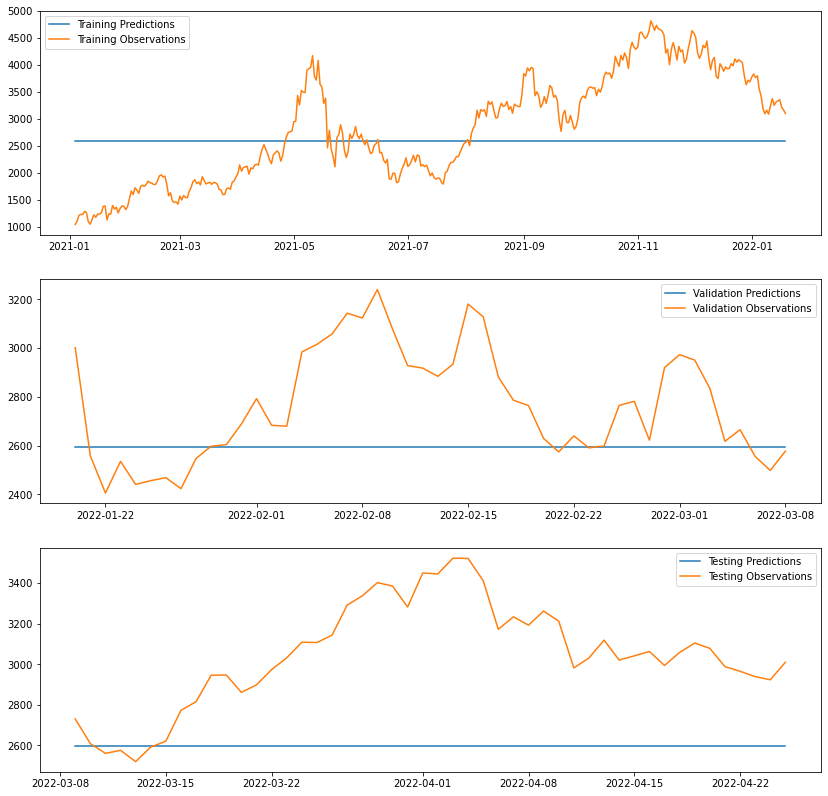

In [26]:
#PREDICT THE VALUES USING THE MODEL
train_predictions = model.predict(X_train).flatten()
val_predictions = model.predict(X_val).flatten()
test_predictions = model.predict(X_test).flatten()


fig,axs = plt.subplots(3, 1, figsize=(14,14))

axs[0].plot(dates_train, train_predictions)
axs[0].plot(dates_train, y_train)
axs[0].legend(['Training Predictions', 'Training Observations'])

axs[1].plot(dates_val, val_predictions)
axs[1].plot(dates_val, y_val)
axs[1].legend(['Validation Predictions', 'Validation Observations'])

axs[2].plot(dates_test, test_predictions)
axs[2].plot(dates_test, y_test)
axs[2].legend(['Testing Predictions', 'Testing Observations'])

plt.savefig('../analysis/LTSM_recursive/'+coin_name +'_modelPredictions'+'.png')

## <font color='#5D6D7E'>Recursive Predictions</font> <a class="anchor" id="twentysixth-bullet"></a>
  [Back to TOC](#toc)

In [27]:
from copy import deepcopy

#Get prediction for future dates recursively based on the previous existing information. Then update the window of days upon
#which the predictions are made

recursive_predictions = []
recursive_dates = np.concatenate([dates_test])

last_window = deepcopy(X_train[-1])

for target_date in recursive_dates:
    next_prediction = model.predict(np.array([last_window])).flatten()
    recursive_predictions.append(next_prediction)
    last_window = np.insert(last_window,0,next_prediction)[:-1]
    

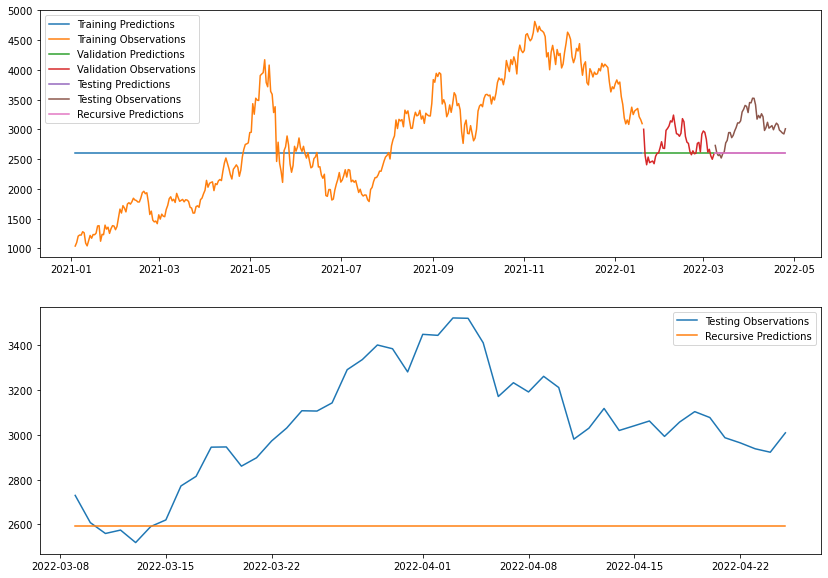

In [28]:
fig,axs = plt.subplots(2, 1, figsize=(14,10))

axs[0].plot(dates_train, train_predictions)
axs[0].plot(dates_train, y_train)
axs[0].plot(dates_val, val_predictions)
axs[0].plot(dates_val, y_val)
axs[0].plot(dates_test, test_predictions)
axs[0].plot(dates_test, y_test)
axs[0].plot(recursive_dates, recursive_predictions)
axs[0].legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])

axs[1].plot(dates_test, y_test)
axs[1].plot(recursive_dates, recursive_predictions)
axs[1].legend(['Testing Observations',
              'Recursive Predictions'])

plt.savefig('../analysis/LTSM_recursive/'+coin_name +'_recursivePredictions'+'.png')